In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [ ]:
import os
os.environ['OMP_NUM_THREADS']='1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:


fileName = '/content/drive/MyDrive/Step Up Data Set.csv'

In [ ]:
data = pd.read_csv(fileName)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert total charges to float 
# The null values are converting to nan
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:


# convert total charges to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# identify the values that could not be converted
invalid_values = data[data['TotalCharges'].isna()]['TotalCharges']

#print(data2)
print("Invalid values:", invalid_values)

Invalid values: 488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64


In [ ]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [ ]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [ ]:
data2 = data

In [ ]:
data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[5 rows x 21 columns]

In [ ]:
data.isna()
#to see the number of  missing values

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False           False  ...   
1            False          False            False           False  ...   
2            False          False            False           False  ...   
3            False          False            False           False  ...   
4            False          False            False           False  ...   
...            ...            ...              ...             ...  ...   
7038         False          False            False           False  ...   
7039         False          False            False           False  ...   
7040         False          False            False           False  ...   
7041         False          False            False           False  ...   
7042         False          False            False           False  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                False        False        False            False     False   
1                False        False        False            False     False   
2                False        False        False            False     False   
3                False        False        False            False     False   
4                False        False        False            False     False   
...                ...          ...          ...              ...       ...   
7038             False        False        False            False     False   
7039             False        False        False            False     False   
7040             False        False        False            False     False   
7041             False        False        False            False     False   
7042             False        False        False            False     False   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                False          False           False         False  False  
1                False          False           False         False  False  
2                False          False           False         False  False  
3                False          False           False         False  False  
4                False          False           False         False  False  
...                ...            ...             ...           ...    ...  
7038             False          False           False         False  False  
7039             False          False           False         False  False  
7040             False          False           False         False  False  
7041             False          False           False         False  False  
7042             False          False           False         False  False  

[7043 rows x 21 columns]

In [ ]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
set(data.duplicated())

{False}

In [ ]:
# we can pass the result of the df.duplicated into a set to see if there is any instance of True
# No duplicates in the data
set(data.duplicated())

{False}

In [ ]:
data.shape

(7043, 21)

In [ ]:
# Checking the class imbalance
data['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
df=data

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# HERE

In [ ]:
# To split the data into Churn or not churn

In [ ]:
#Churn data
ChurnData = df[df["Churn"]=="Yes"]
ChurnData.shape

(1869, 21)

In [ ]:
# Not Churn data
NotChurnData = df[df["Churn"]=="No"]
NotChurnData.shape

(5174, 21)

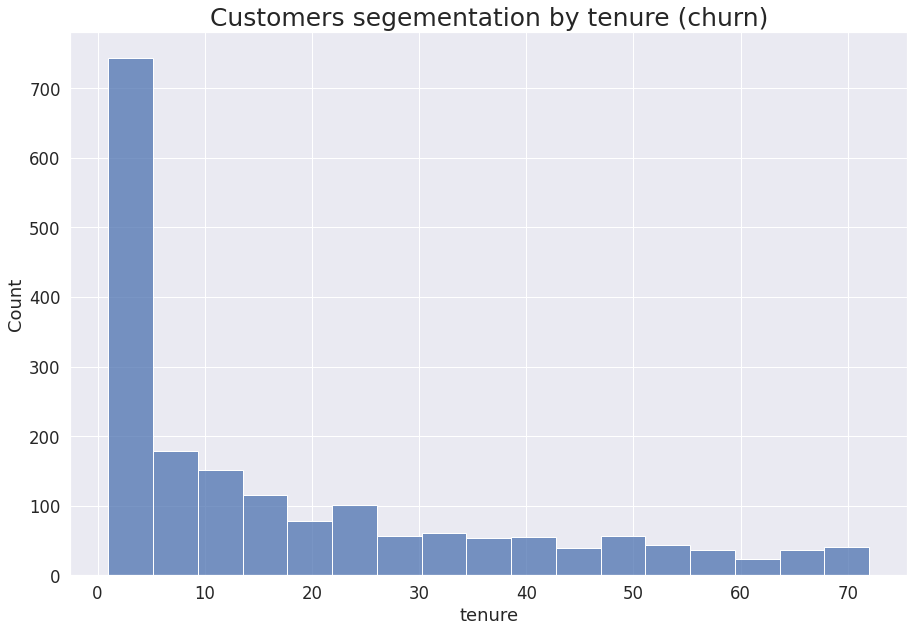

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(ChurnData.tenure)
plt.title('Customers segementation by tenure (churn)', fontsize = 25)
plt.show()

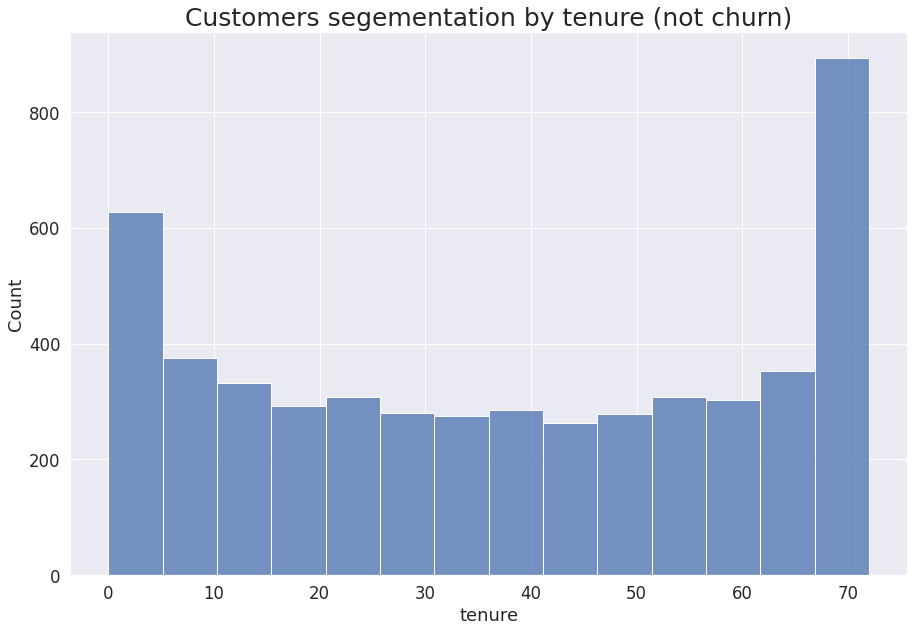

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(NotChurnData.tenure)
plt.title('Customers segementation by tenure (not churn)', fontsize = 25)
plt.show()

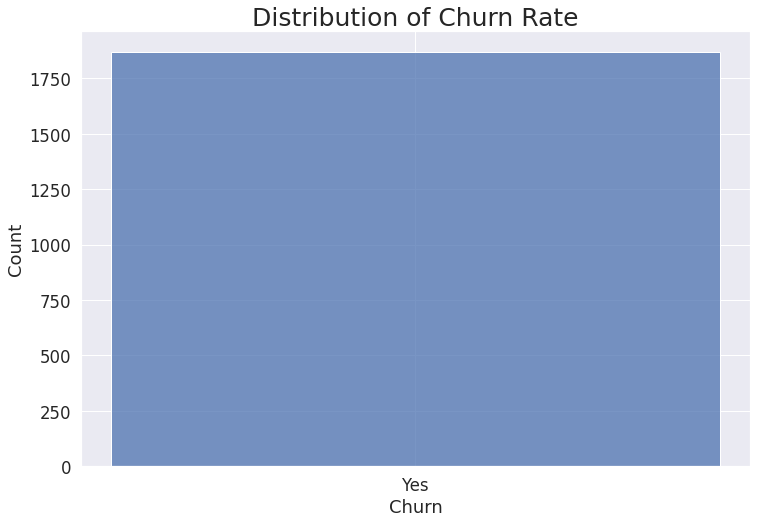

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(ChurnData.Churn)
plt.title('Distribution of Churn Rate', fontsize = 25)
plt.show()

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

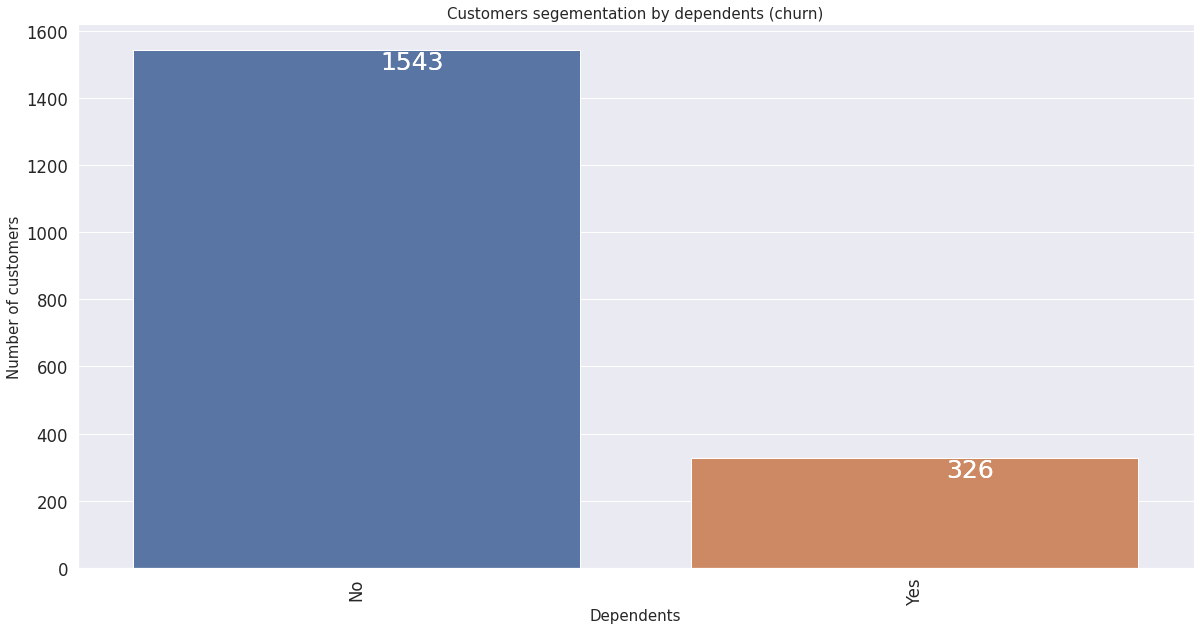

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Dependents', data=ChurnData)
ax.set_title('Customers segementation by dependents (churn)' , fontsize = 15)
sns.set(font_scale=1.5)
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='white', size=25)

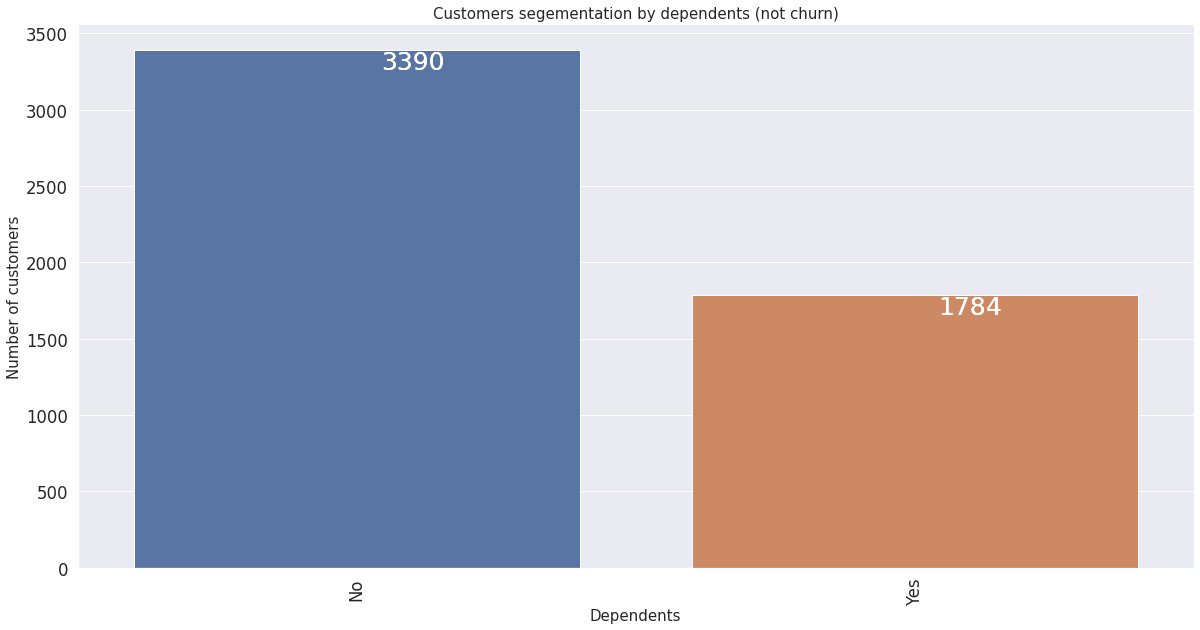

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Dependents', data=NotChurnData)
ax.set_title('Customers segementation by dependents (not churn)' , fontsize = 15)
sns.set(font_scale=1.5)
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='white', size=25)

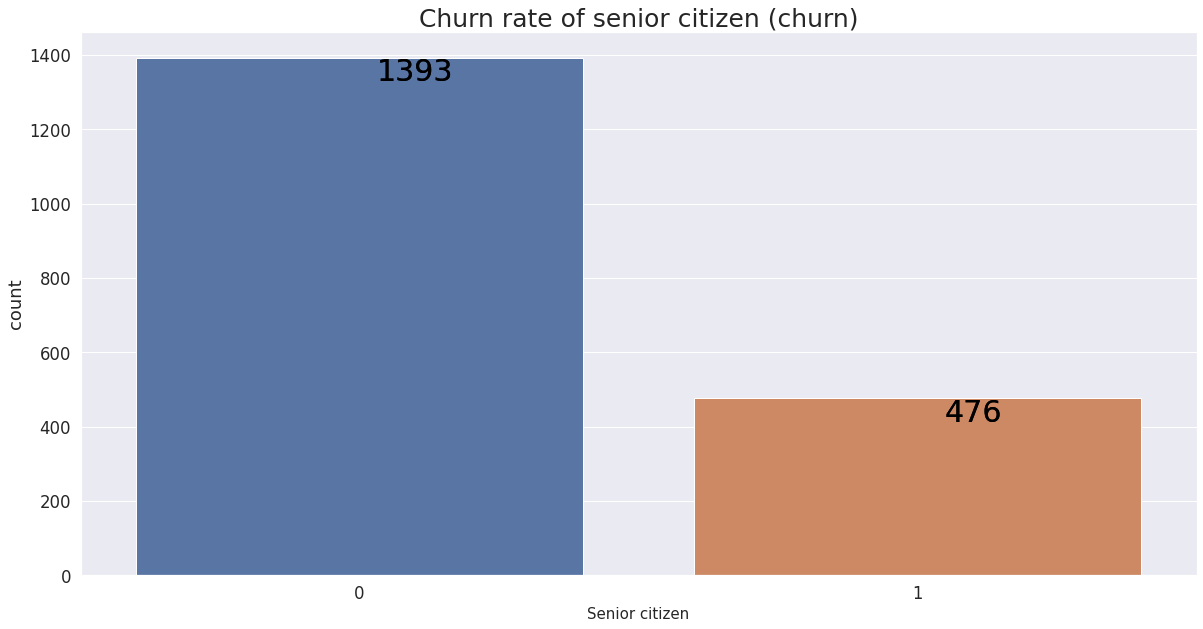

In [ ]:
 
plt.figure(figsize=(20,10))
ax=sns.countplot(x='SeniorCitizen', data=ChurnData)
ax.set_title('Churn rate of senior citizen (churn)' , fontsize = 25)
plt.xlabel('Senior citizen', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='black', size=30)

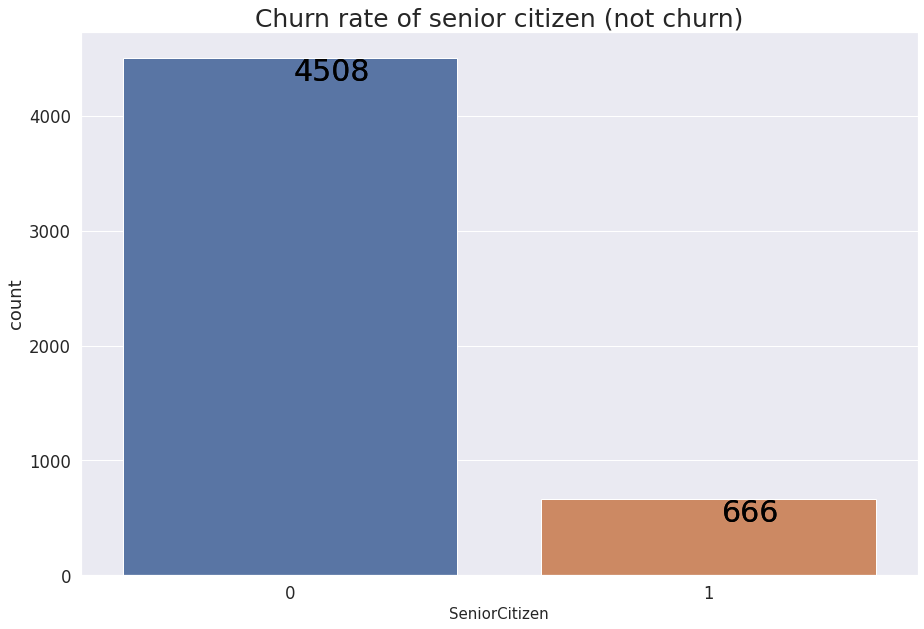

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='SeniorCitizen', data=NotChurnData)
ax.set_title('Churn rate of senior citizen (not churn)' , fontsize = 25)
plt.xlabel('SeniorCitizen', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='black', size=30)

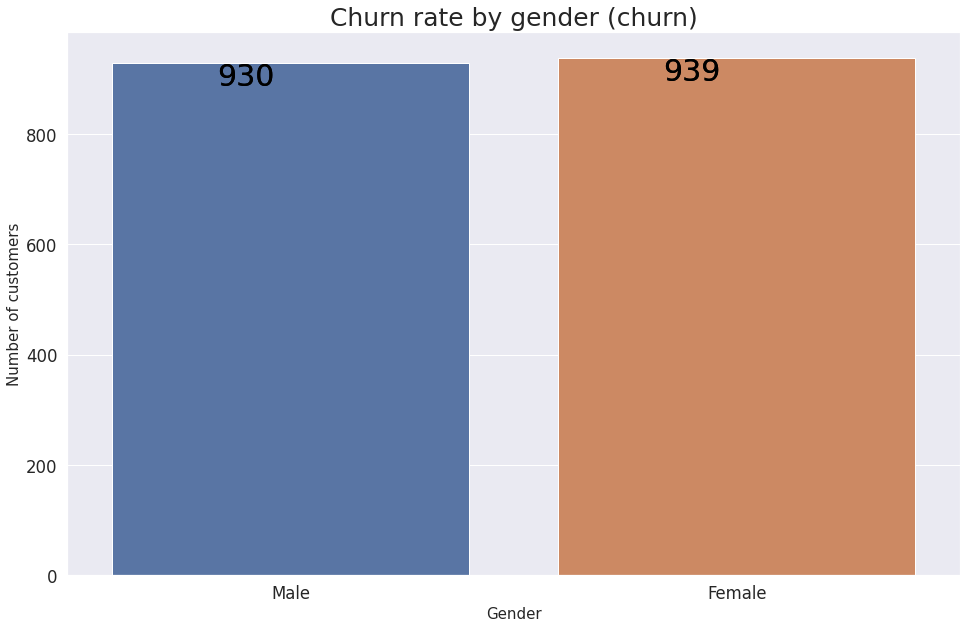

In [ ]:
 

plt.figure(figsize=(16,10))
ax=sns.countplot(x='gender', data=ChurnData)
ax.set_title('Churn rate by gender (churn)' , fontsize = 25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='black', size=30)

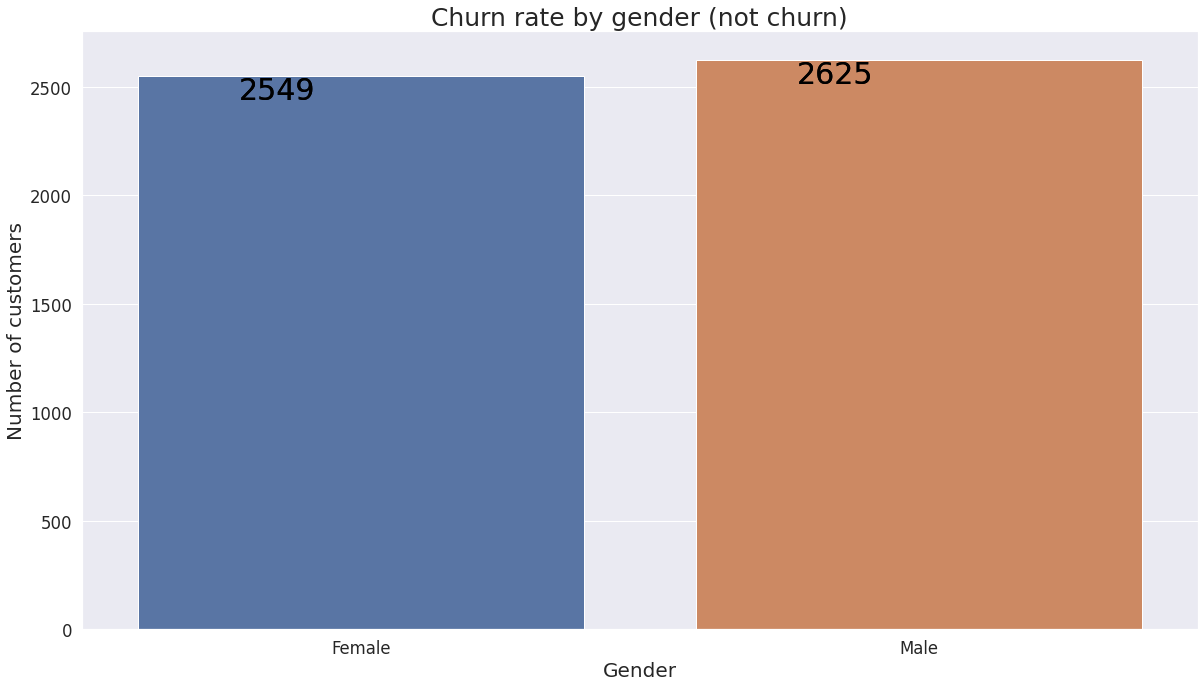

In [ ]:


plt.figure(figsize=(20,11))
ax=sns.countplot(x='gender', data=NotChurnData)
ax.set_title('Churn rate by gender (not churn)' , fontsize = 25)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)
        

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:

binsA = pd.cut(ChurnData['tenure'], 7)
bins1 = pd.cut(NotChurnData['tenure'], 7)
dfChurn = ChurnData['tenure']

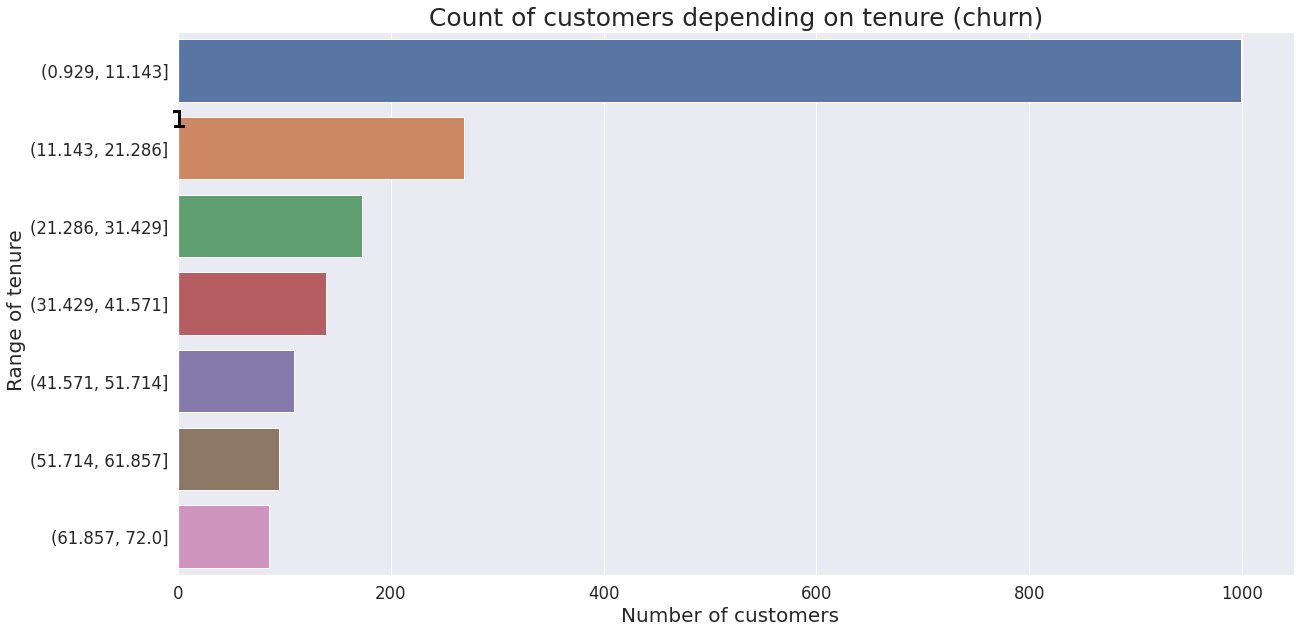

In [ ]:

plt.figure(figsize=(20,10))
ax=sns.countplot(y=binsA)
sns.set(font_scale=1.5)
ax.set_title('Count of customers depending on tenure (churn)' , fontsize = 25)
plt.xlabel('Number of customers  ', fontsize=20)
plt.ylabel('Range of tenure  ', fontsize=20)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=25)

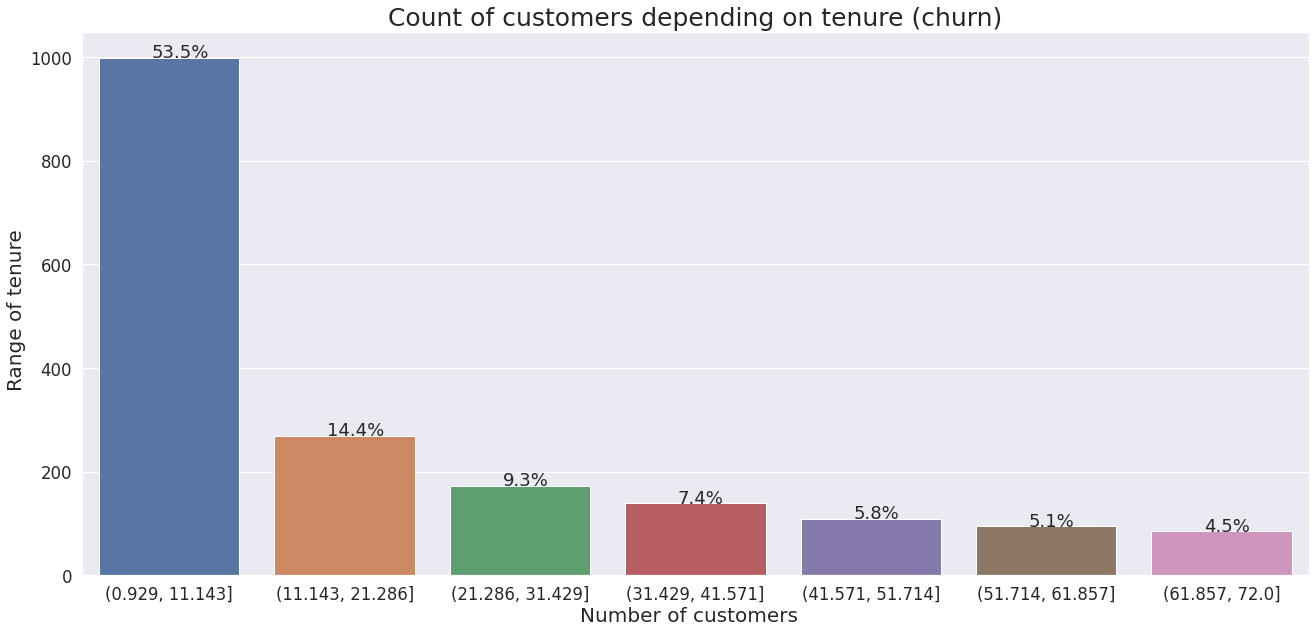

In [ ]:
plt.figure(figsize=(22,10))
ax=sns.countplot(x=binsA)
sns.set(font_scale=1.5)
ax.set_title('Count of customers depending on tenure (churn)' , fontsize = 25)
plt.xlabel('Number of customers  ', fontsize=20)
plt.ylabel('Range of tenure  ', fontsize=20)
plt.xticks(rotation='horizontal')

total = float(len(ChurnData))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

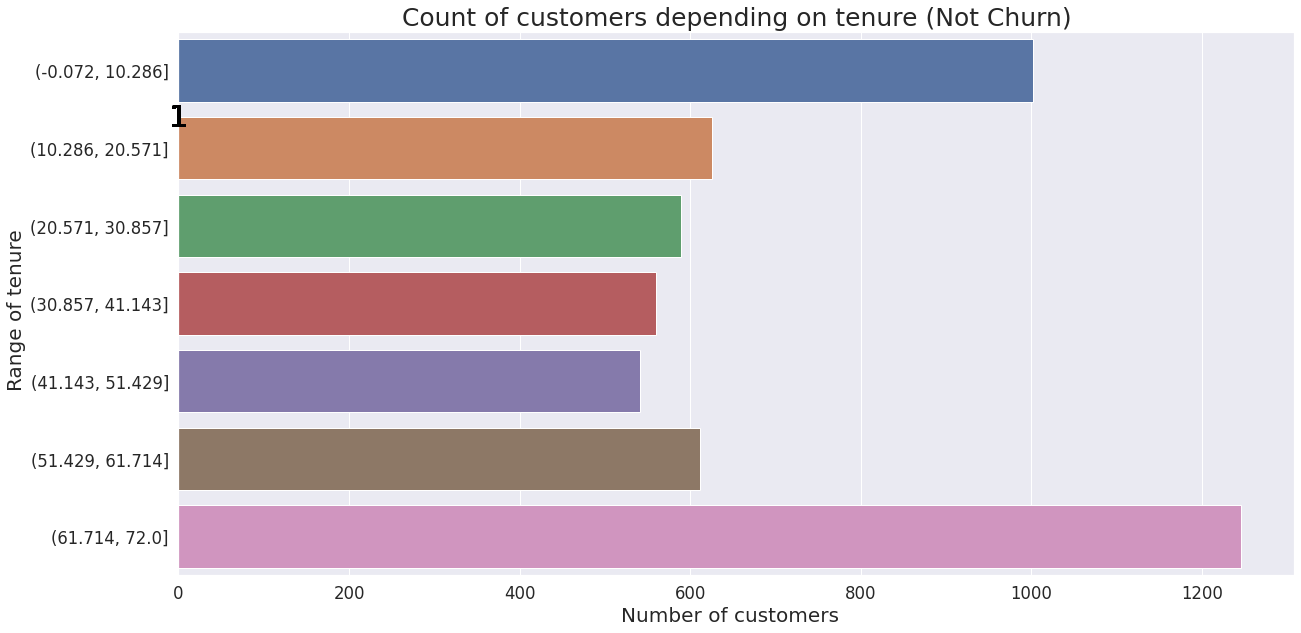

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(y=bins1)
sns.set(font_scale=1.5)
ax.set_title('Count of customers depending on tenure (Not Churn)' , fontsize = 25)
plt.xlabel('Number of customers  ', fontsize=20)
plt.ylabel('Range of tenure  ', fontsize=20)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=30)

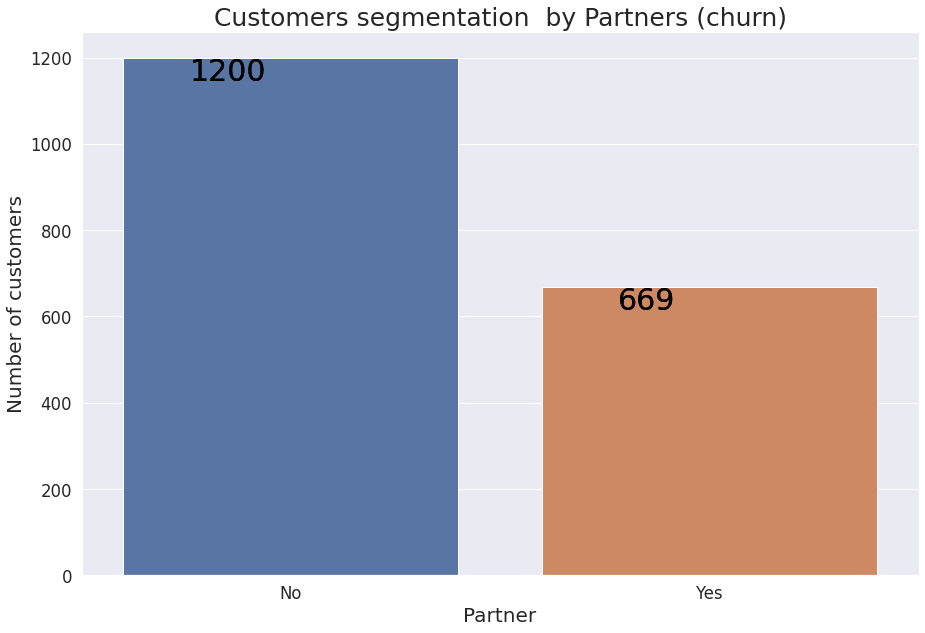

In [ ]:

plt.figure(figsize=(15,10))
ax=sns.countplot(x='Partner', data=ChurnData)
ax.set_title('Customers segmentation  by Partners (churn)' , fontsize = 25)
plt.xlabel('Partner', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

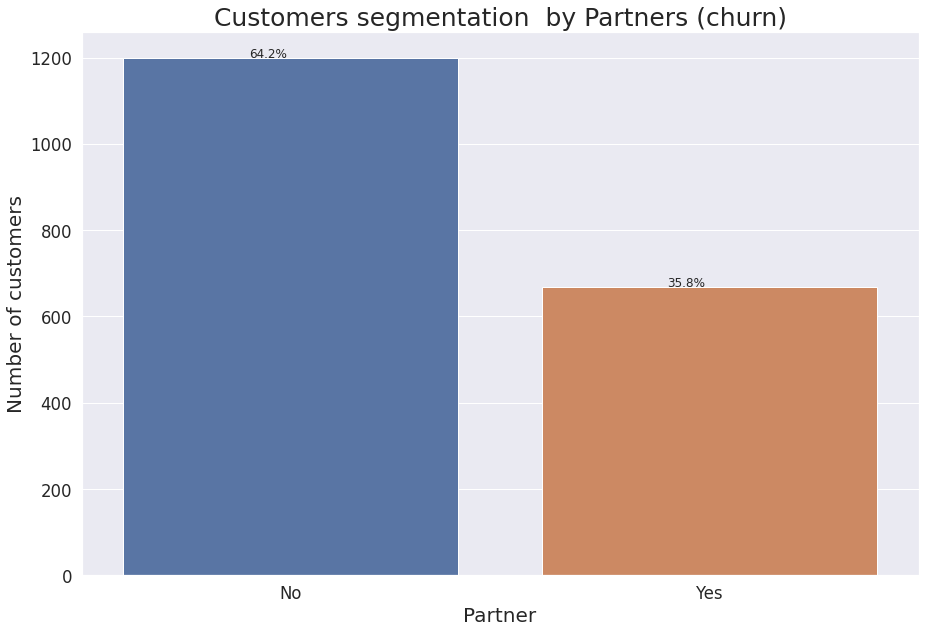

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Partner', data=ChurnData)
ax.set_title('Customers segmentation  by Partners (churn)' , fontsize = 25)
plt.xlabel('Partner', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.xticks(rotation='horizontal')


total = float(len(ChurnData))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

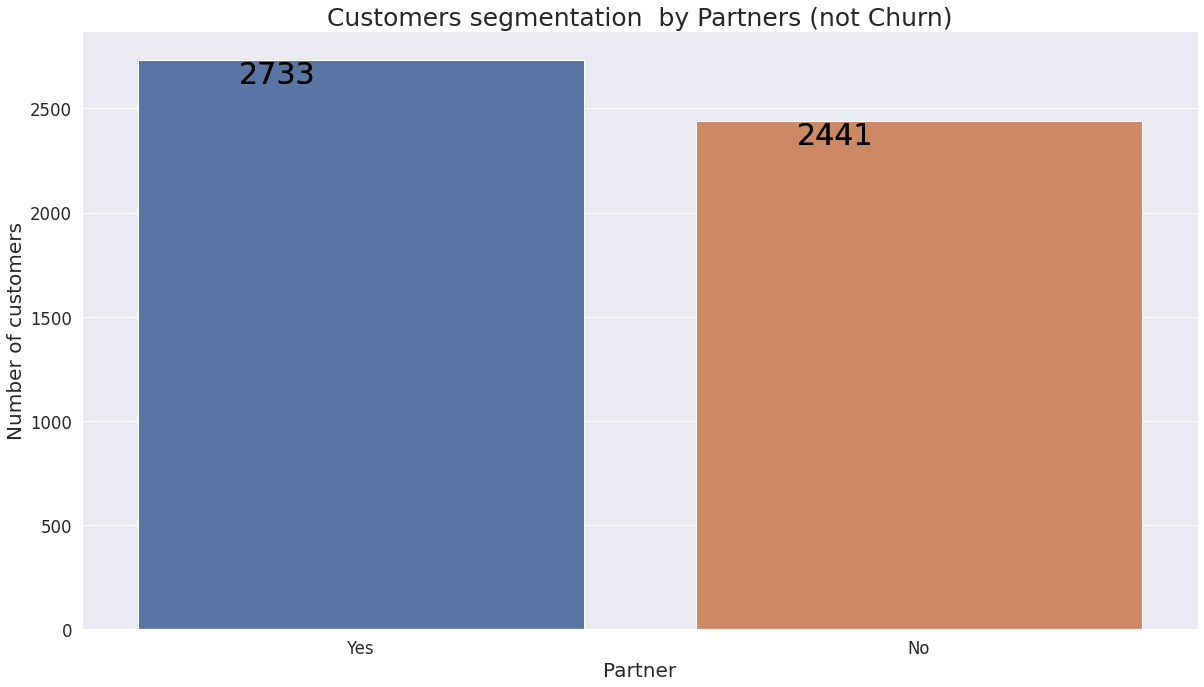

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='Partner', data=NotChurnData)
ax.set_title('Customers segmentation  by Partners (not Churn)' , fontsize = 25)
plt.xlabel('Partner', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

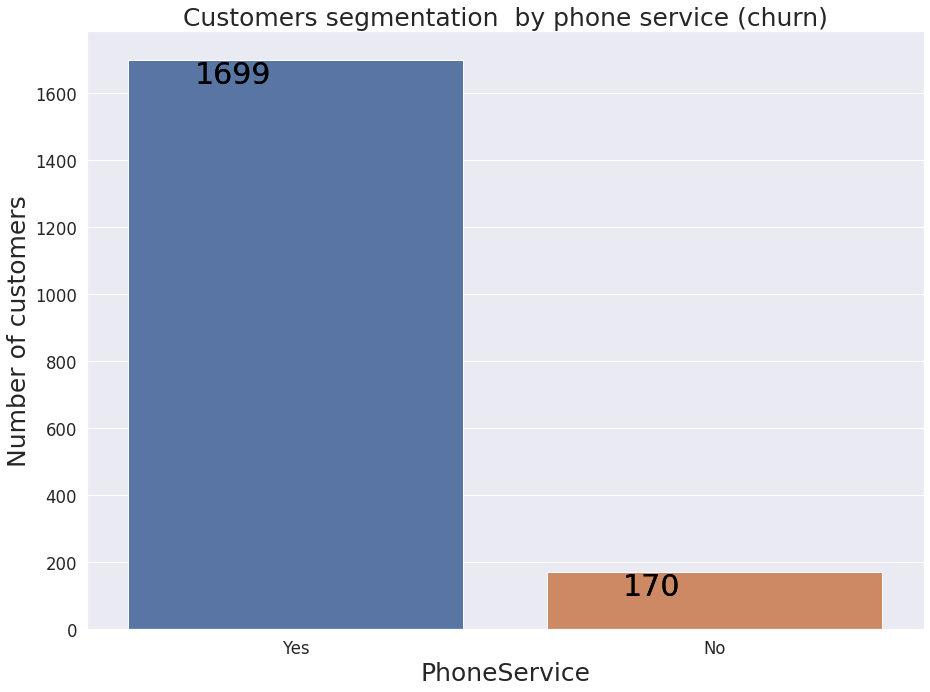

In [ ]:

plt.figure(figsize=(15,11))
ax=sns.countplot(x='PhoneService', data=ChurnData)
ax.set_title('Customers segmentation  by phone service (churn)' , fontsize = 25)
plt.xlabel('PhoneService', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

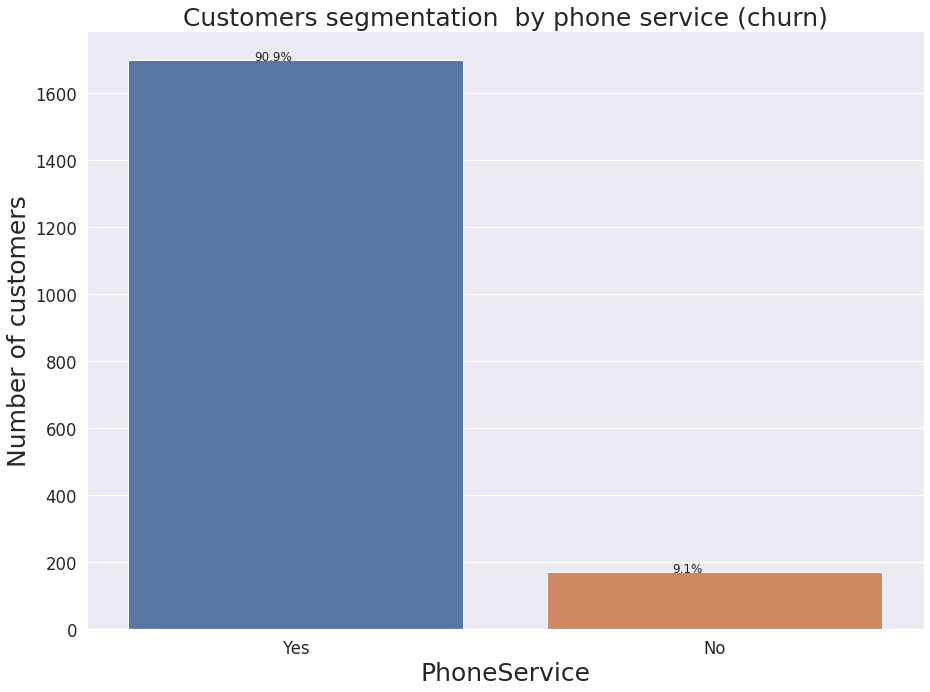

In [ ]:
plt.figure(figsize=(15,11))
ax=sns.countplot(x='PhoneService', data=ChurnData)
ax.set_title('Customers segmentation  by phone service (churn)' , fontsize = 25)
plt.xlabel('PhoneService', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(ChurnData))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

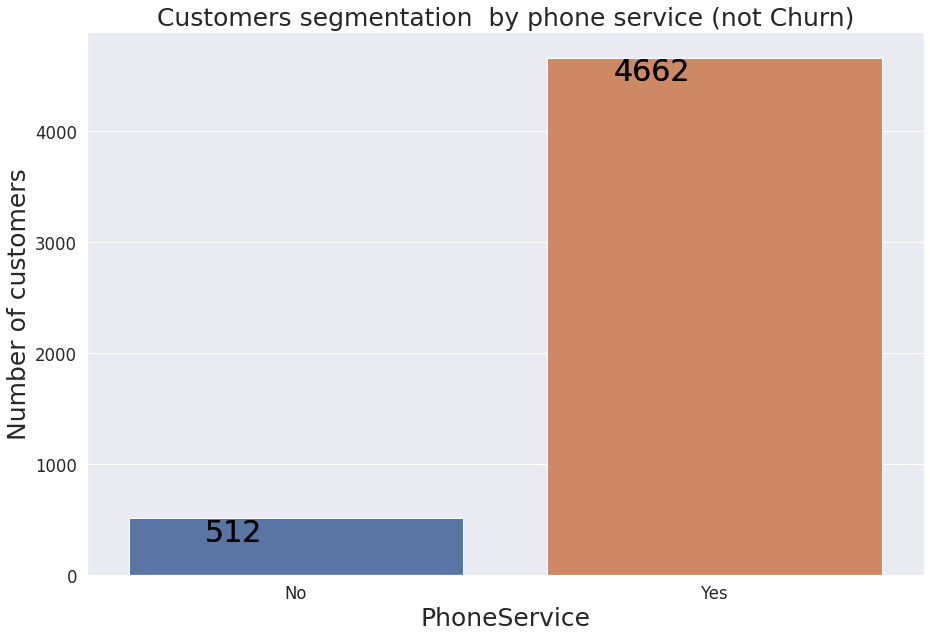

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='PhoneService', data=NotChurnData)
ax.set_title('Customers segmentation  by phone service (not Churn)' , fontsize = 25)
plt.xlabel('PhoneService', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

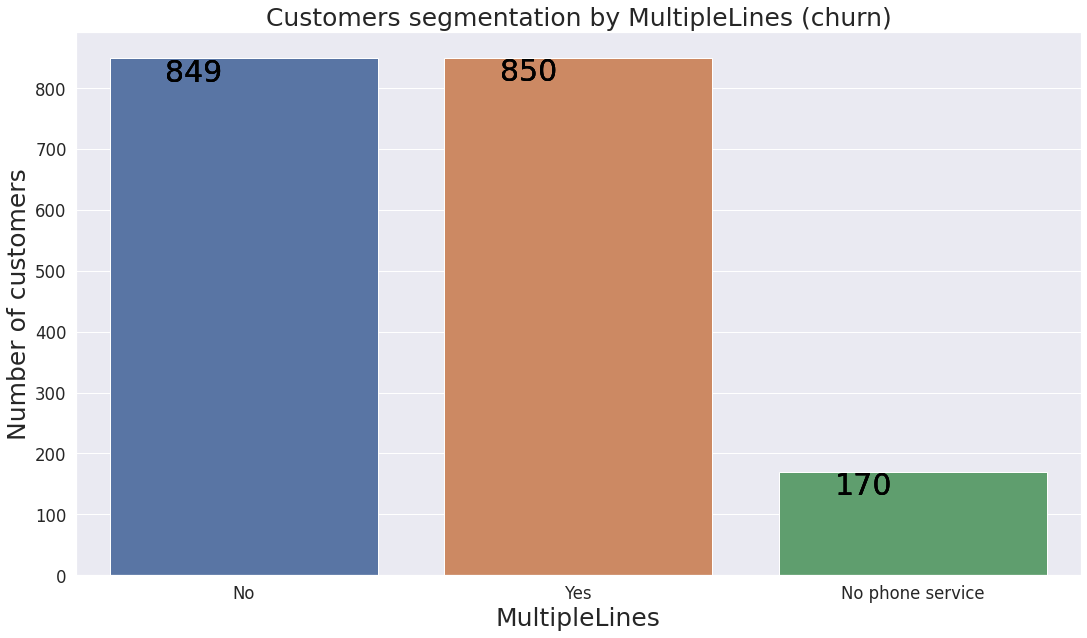

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='MultipleLines', data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by MultipleLines (churn)' , fontsize = 25)
plt.xlabel('MultipleLines', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

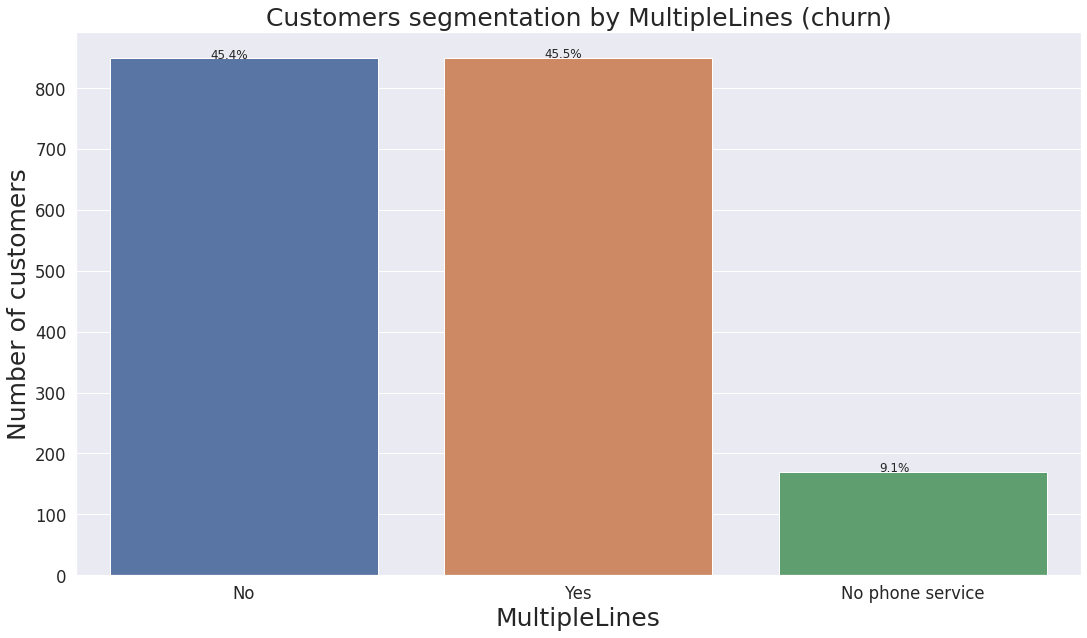

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='MultipleLines', data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by MultipleLines (churn)' , fontsize = 25)
plt.xlabel('MultipleLines', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')


total = float(len(ChurnData))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

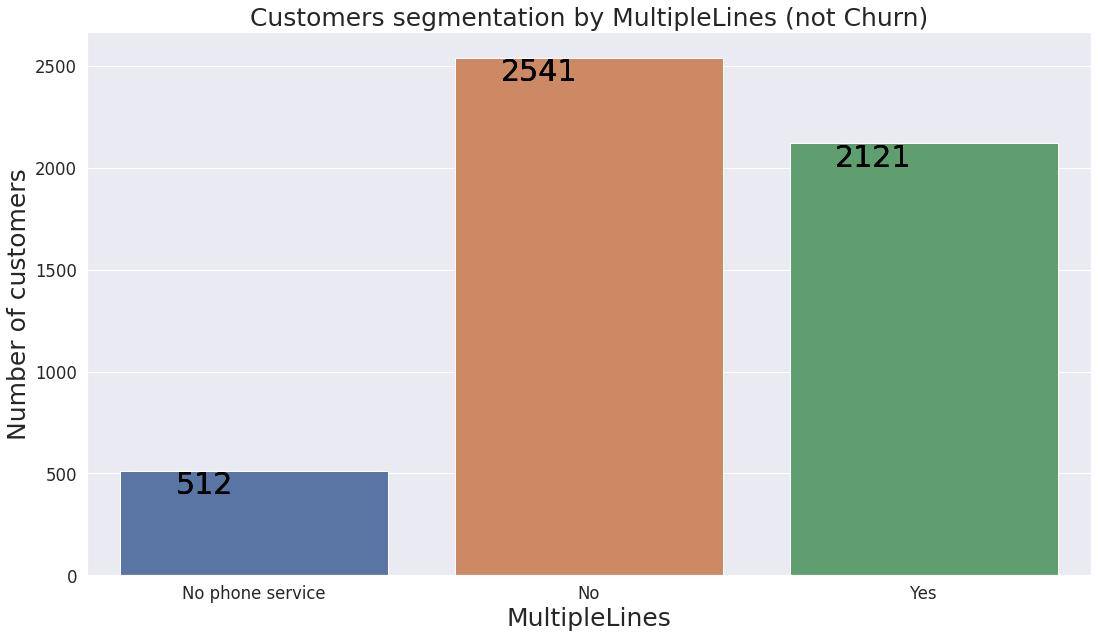

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='MultipleLines', data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by MultipleLines (not Churn)' , fontsize = 25)
plt.xlabel('MultipleLines', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

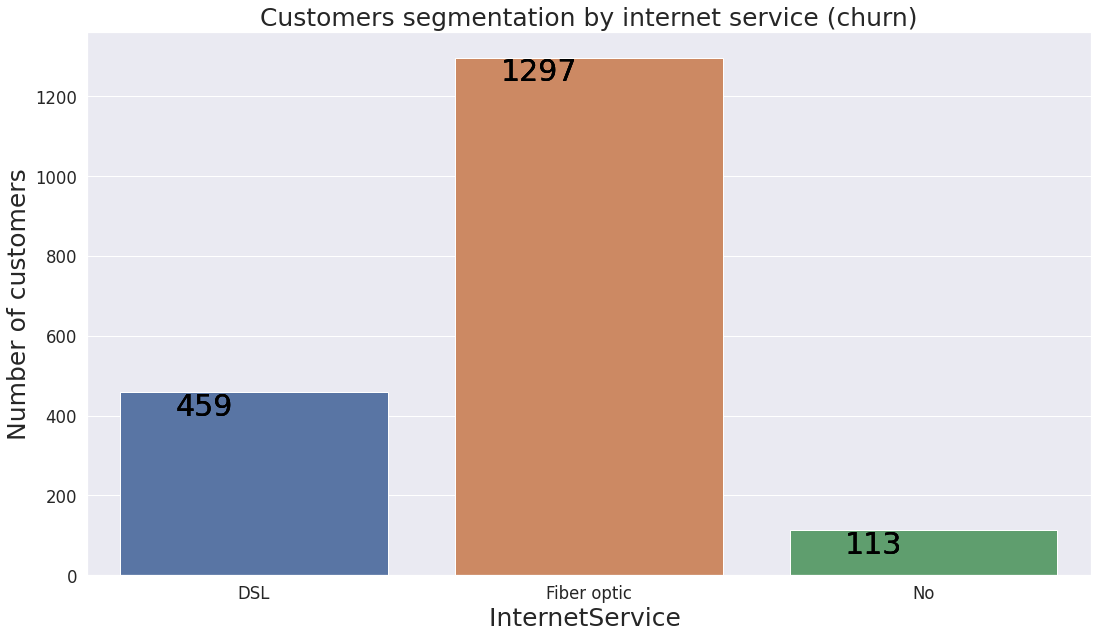

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='InternetService', data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by internet service (churn)' , fontsize = 25)
plt.xlabel('InternetService ', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

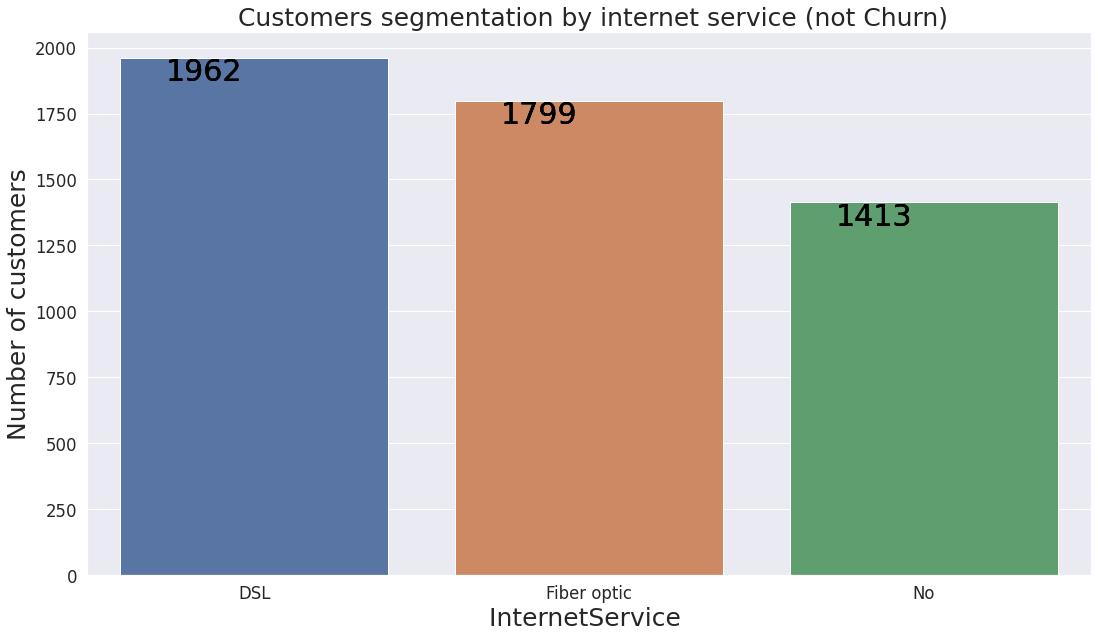

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='InternetService', data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title(' Customers segmentation by internet service (not Churn)' , fontsize = 25)
plt.xlabel('InternetService ', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

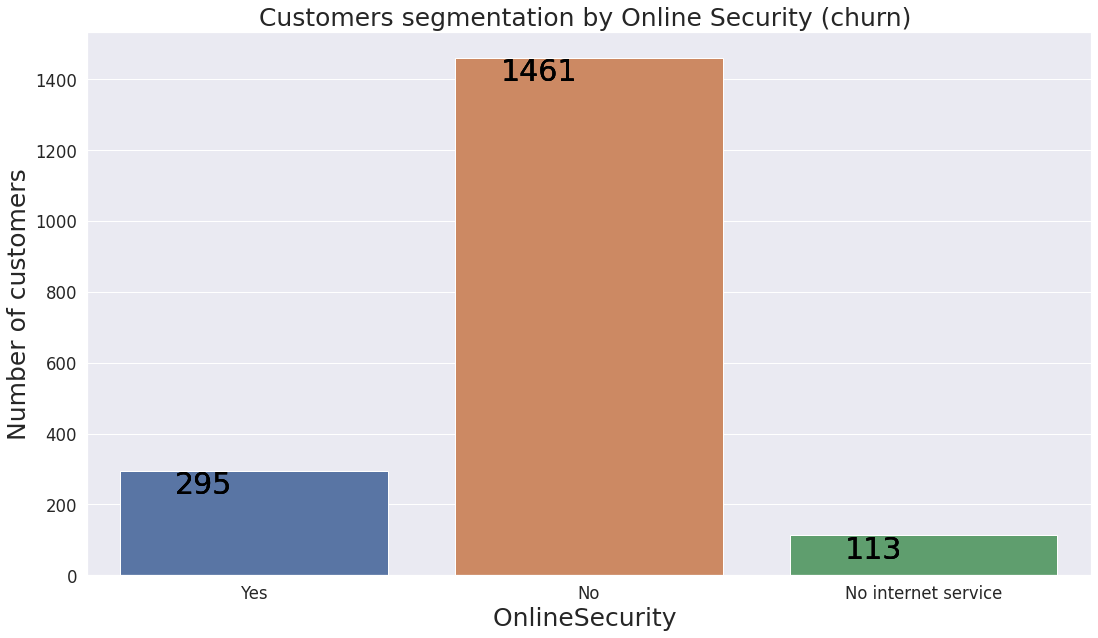

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='OnlineSecurity', data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by Online Security (churn) ' , fontsize = 25)
plt.xlabel('OnlineSecurity ', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

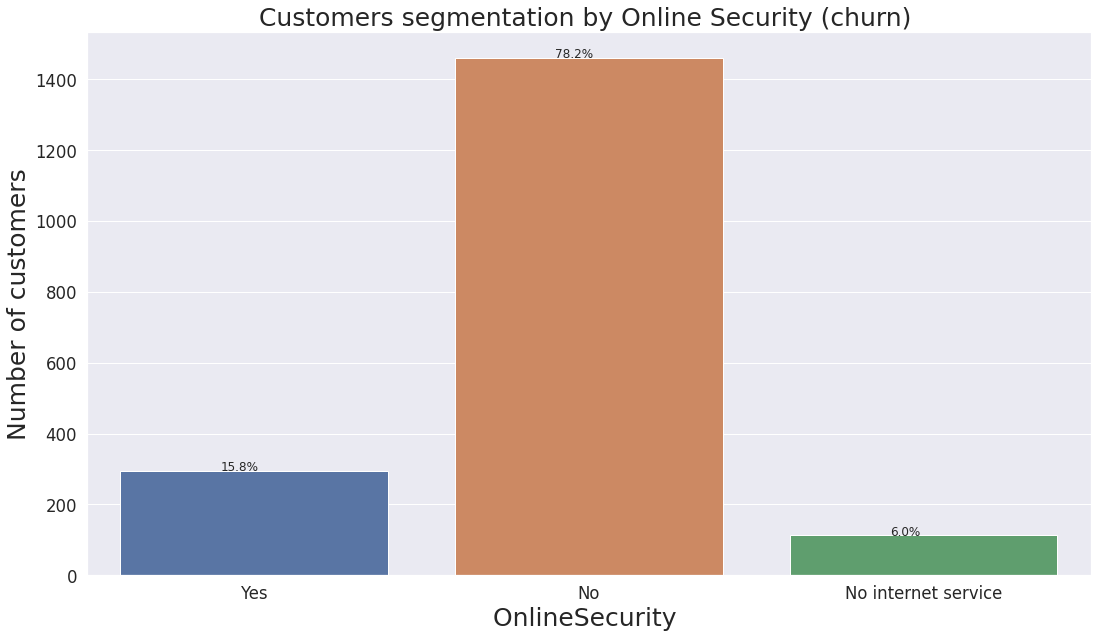

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='OnlineSecurity', data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by Online Security (churn) ' , fontsize = 25)
plt.xlabel('OnlineSecurity ', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')



total = float(len(ChurnData))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)


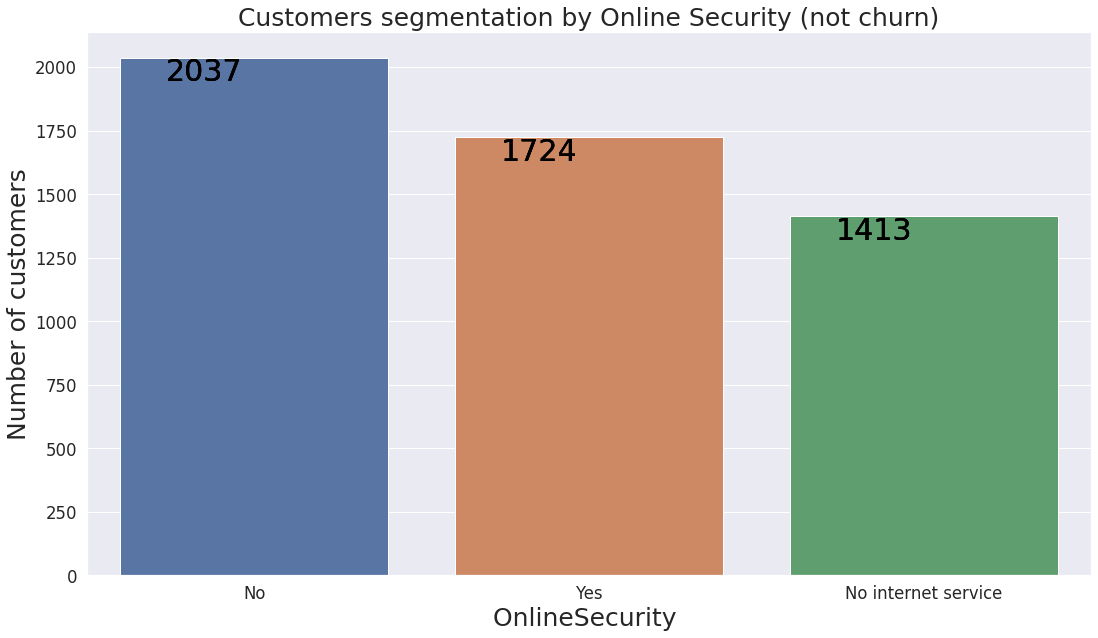

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='OnlineSecurity', data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by Online Security (not churn)' , fontsize = 25)
plt.xlabel('OnlineSecurity ', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

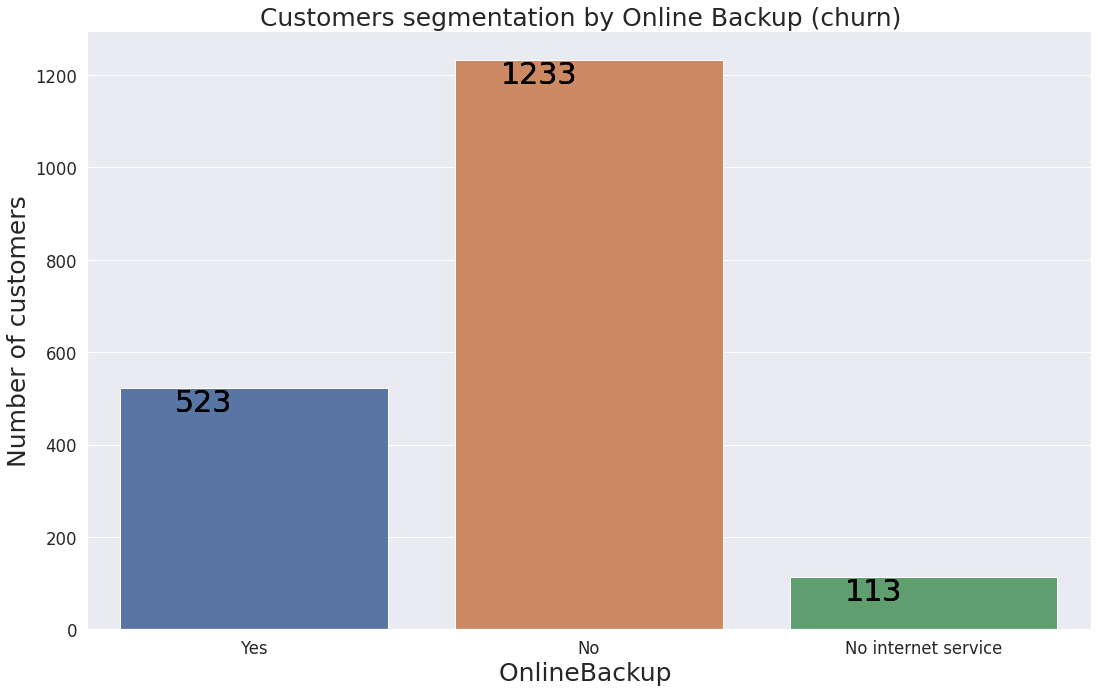

In [ ]:
plt.figure(figsize=(18,11))
ax=sns.countplot(x='OnlineBackup',  data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by Online Backup (churn)  ' , fontsize = 25)
plt.xlabel('OnlineBackup ', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

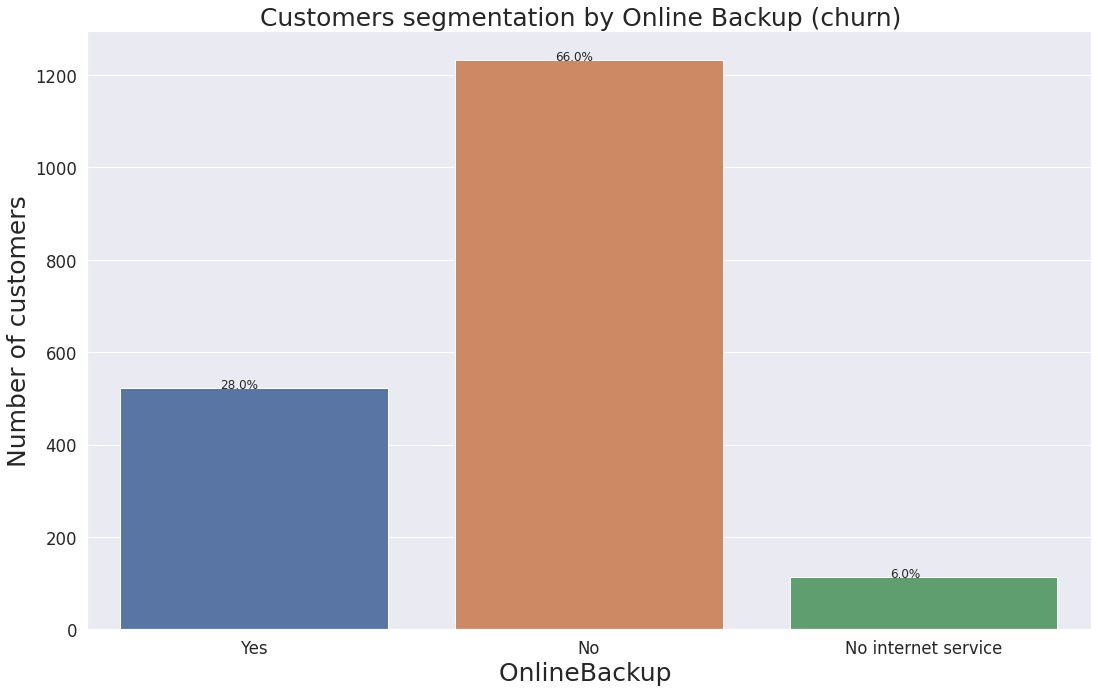

In [ ]:
plt.figure(figsize=(18,11))
ax=sns.countplot(x='OnlineBackup',  data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by Online Backup (churn)  ' , fontsize = 25)
plt.xlabel('OnlineBackup ', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(ChurnData))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

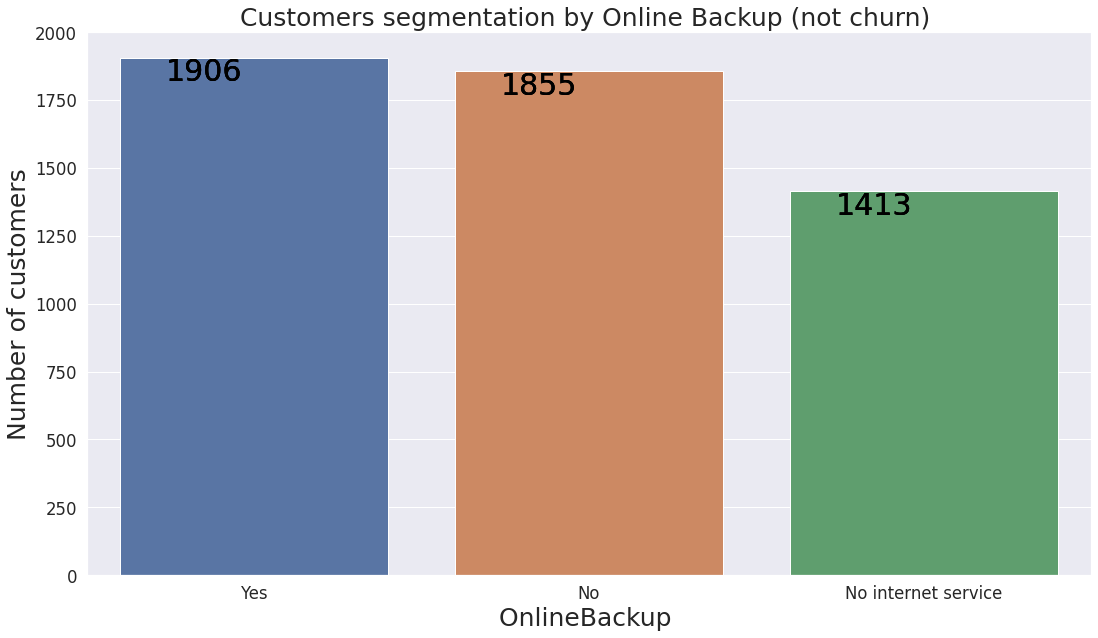

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='OnlineBackup',  data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('Customers segmentation by Online Backup (not churn) ' , fontsize = 25)
plt.xlabel('OnlineBackup ', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

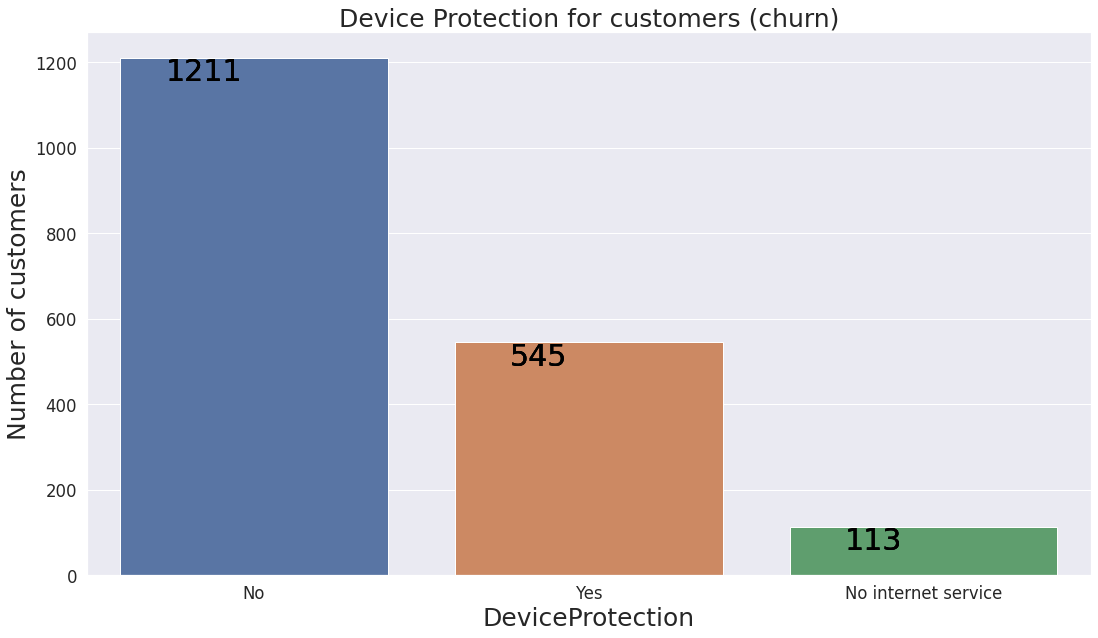

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='DeviceProtection', data=ChurnData)
sns.set(font_scale=2.5)
ax.set_title('Device Protection for customers (churn)' , fontsize = 25)
plt.xlabel('DeviceProtection', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

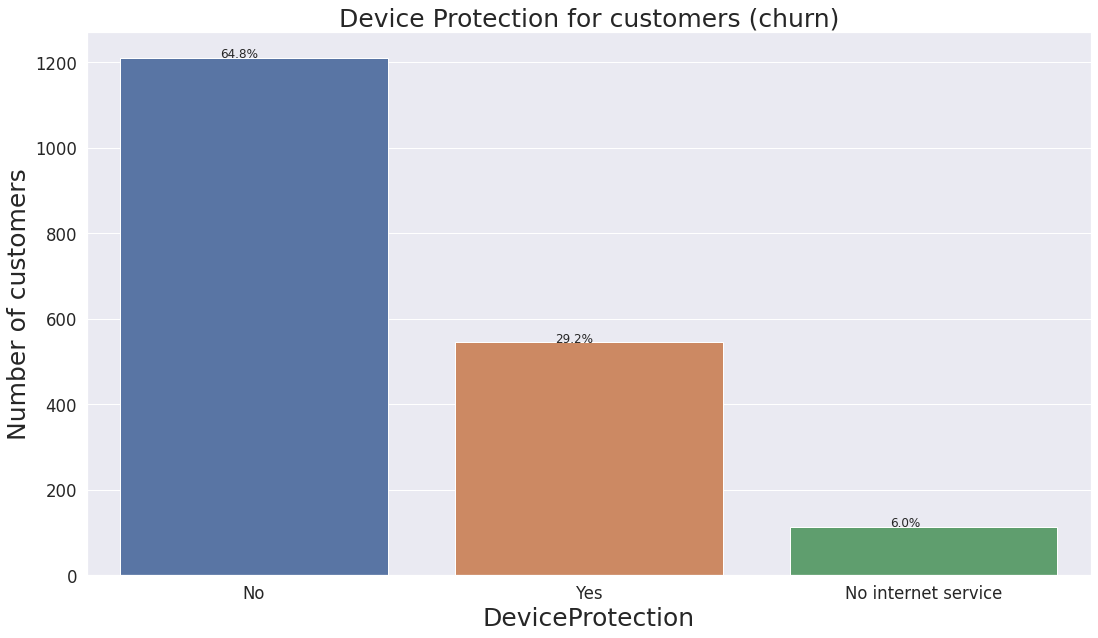

In [ ]:

plt.figure(figsize=(18,10))
ax=sns.countplot(x='DeviceProtection', data=ChurnData)
sns.set(font_scale=2.5)
ax.set_title('Device Protection for customers (churn)' , fontsize = 25)
plt.xlabel('DeviceProtection', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(ChurnData))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)



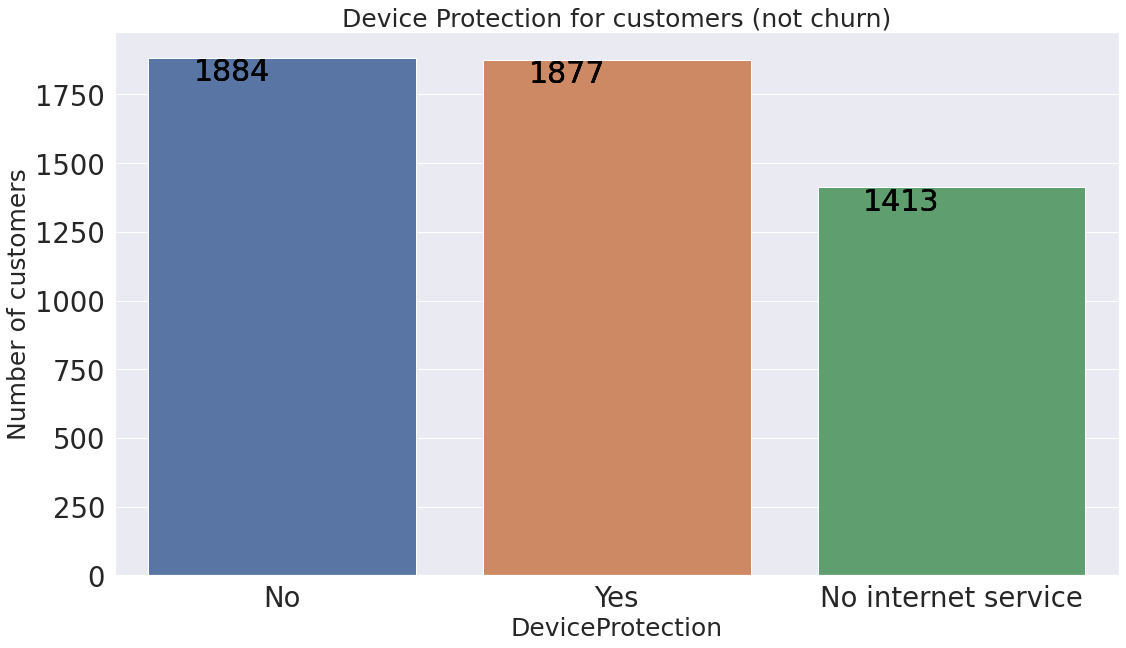

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='DeviceProtection', data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('Device Protection for customers (not churn)' , fontsize = 25)
plt.xlabel('DeviceProtection', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

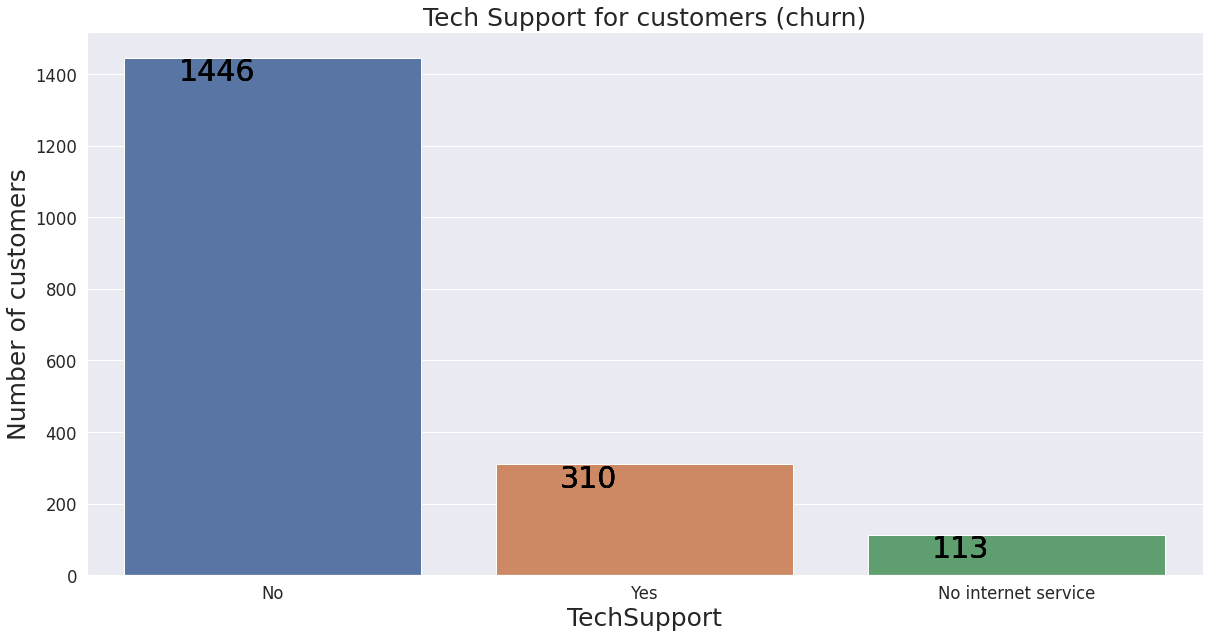

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='TechSupport',  data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('Tech Support for customers (churn)' , fontsize = 25)
plt.xlabel('TechSupport', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

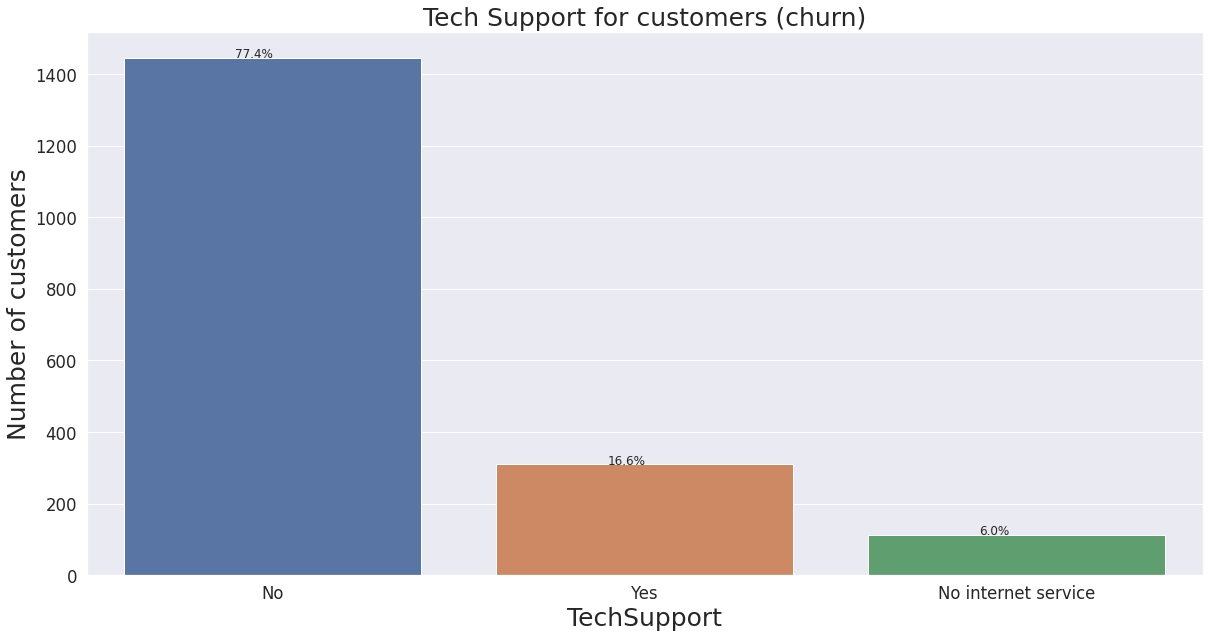

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='TechSupport',  data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('Tech Support for customers (churn)' , fontsize = 25)
plt.xlabel('TechSupport', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(ChurnData))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

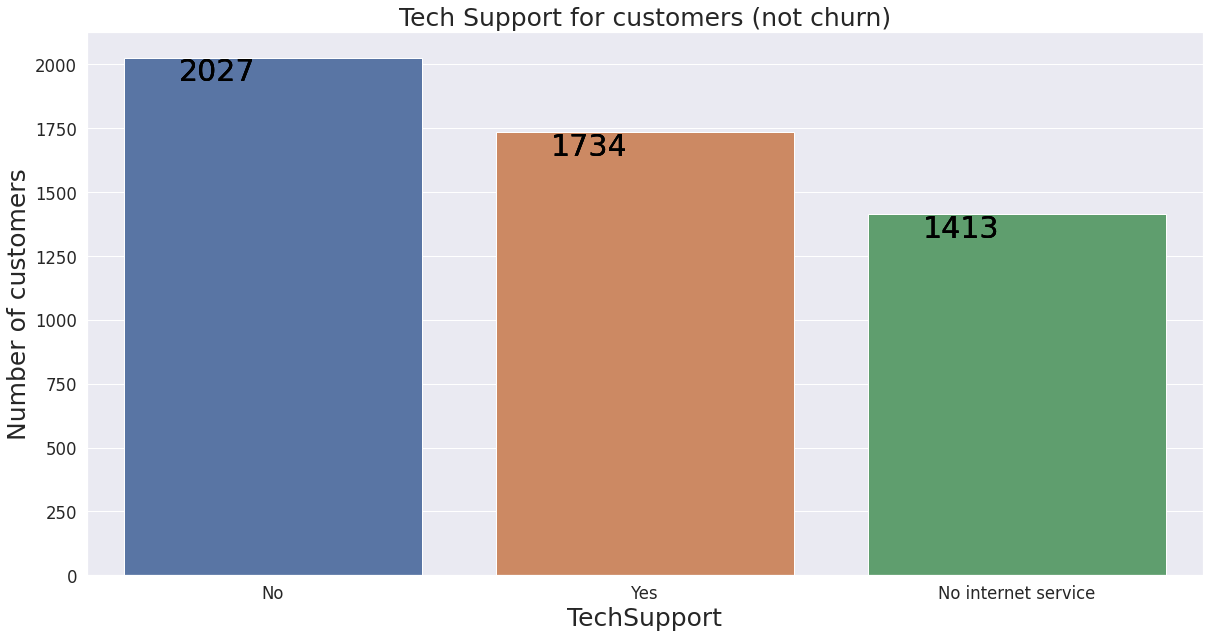

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='TechSupport',  data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('Tech Support for customers (not churn)' , fontsize = 25)
plt.xlabel('TechSupport', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

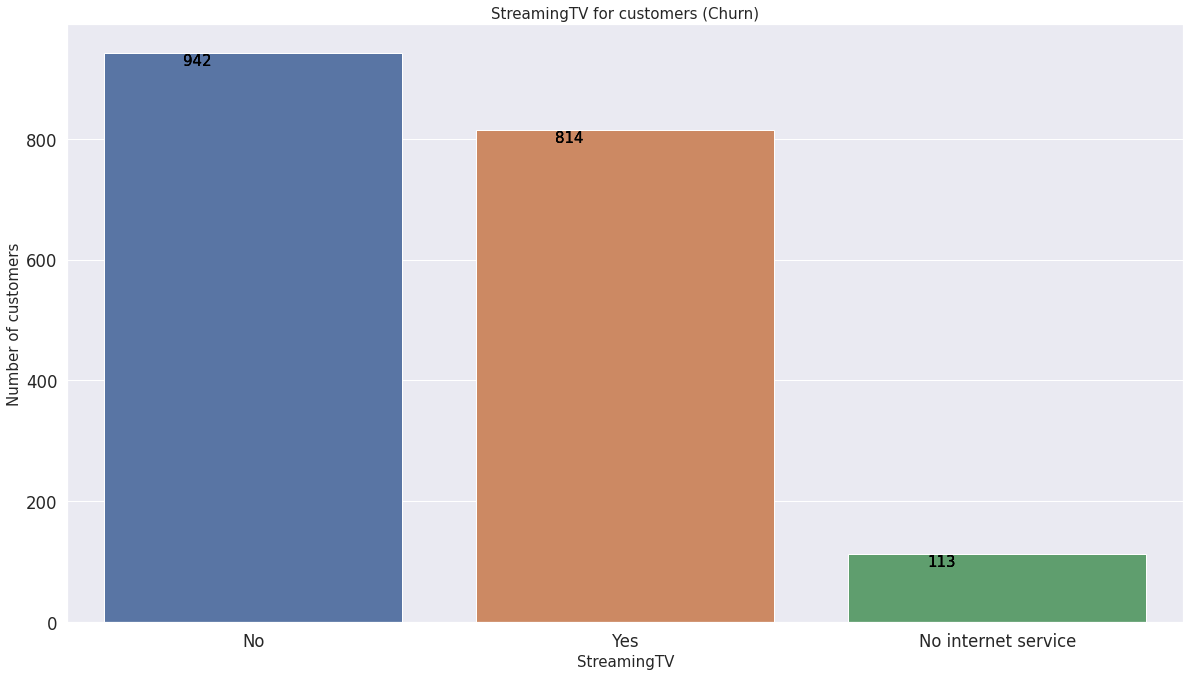

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='StreamingTV', data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('StreamingTV for customers (Churn)' , fontsize = 15)
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

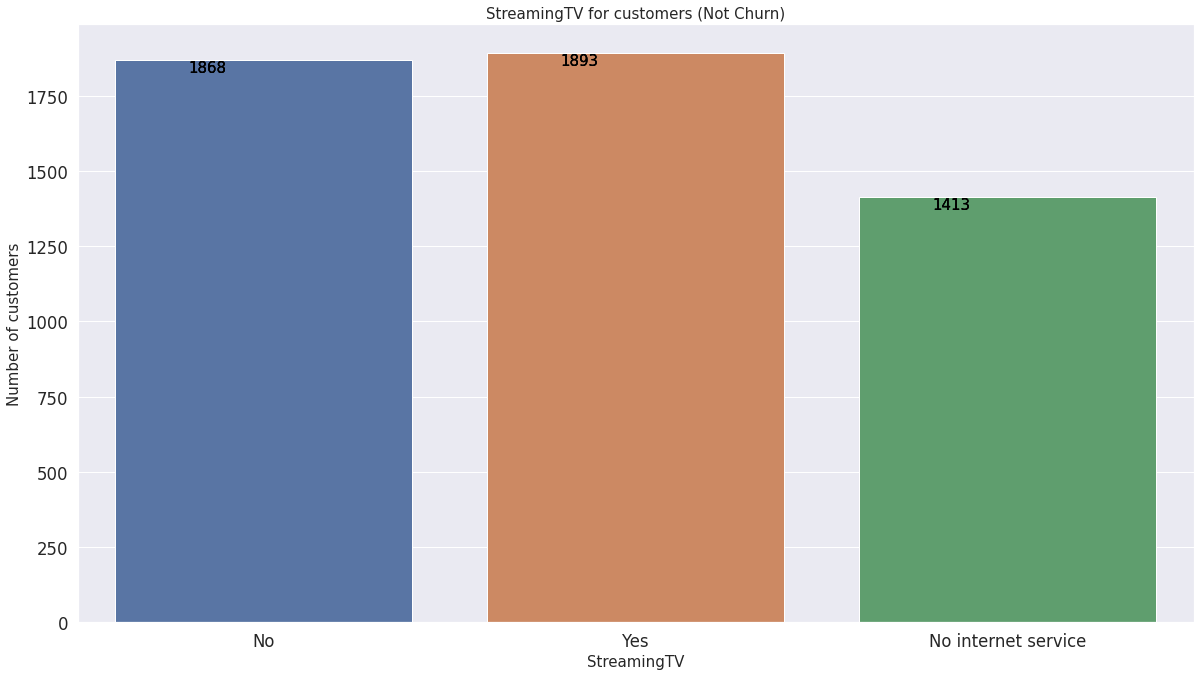

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='StreamingTV', data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('StreamingTV for customers (Not Churn)' , fontsize = 15)
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

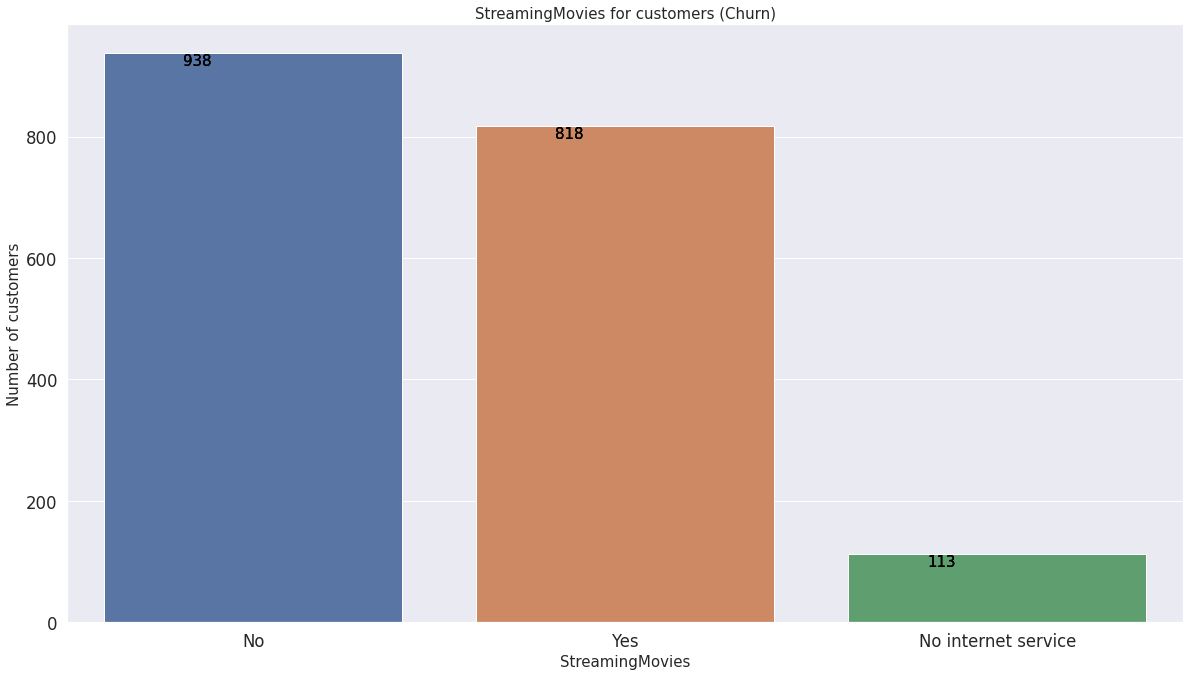

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='StreamingMovies', data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('StreamingMovies for customers (Churn)' , fontsize = 15)
plt.xlabel('StreamingMovies', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

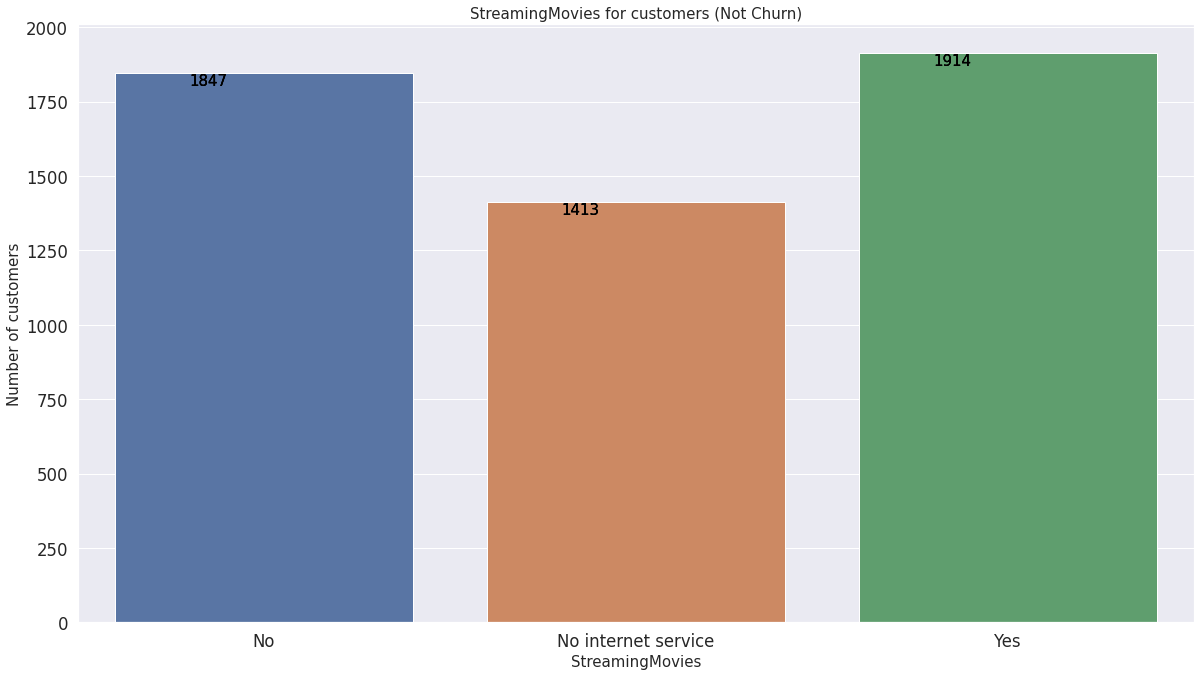

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='StreamingMovies', data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('StreamingMovies for customers (Not Churn)' , fontsize = 15)
plt.xlabel('StreamingMovies', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

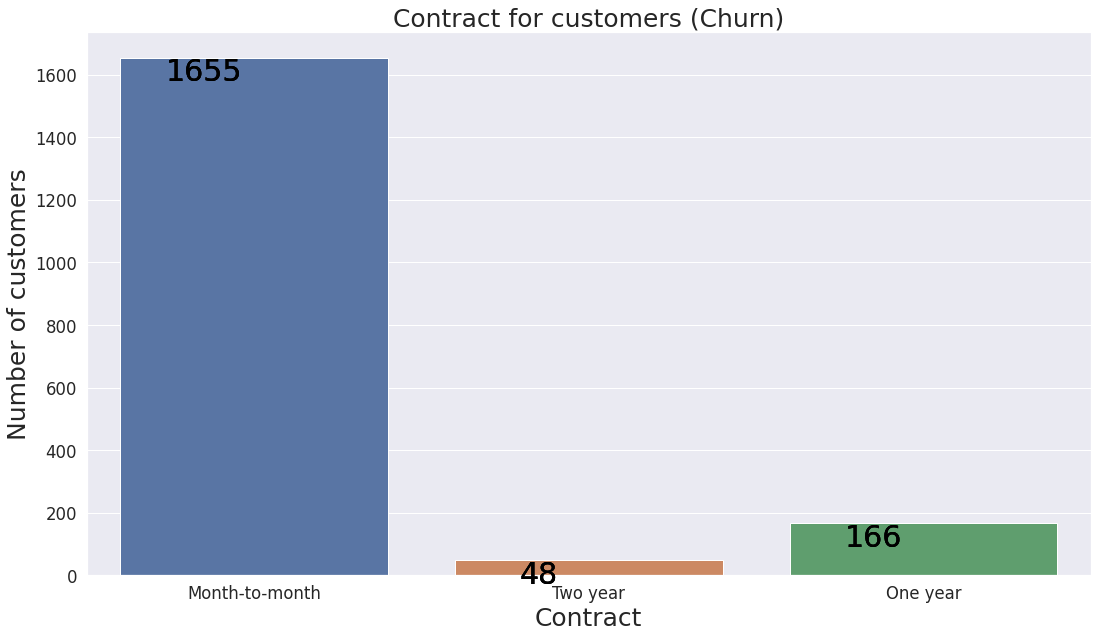

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='Contract', data=ChurnData)
sns.set(font_scale=2.0)
ax.set_title('Contract for customers (Churn)' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

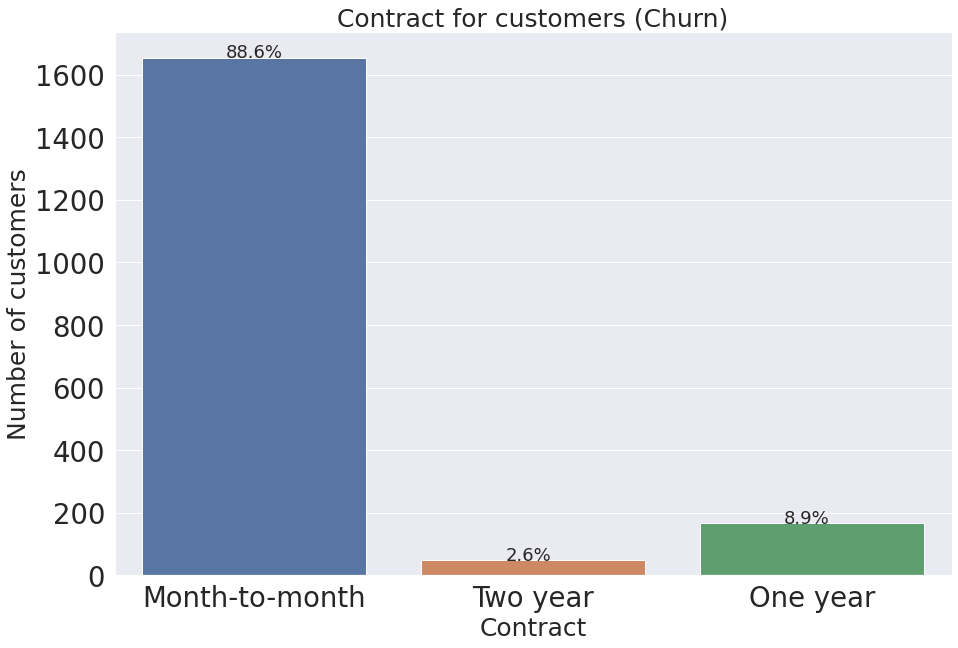

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Contract', data=ChurnData)
sns.set(font_scale=2.5)
ax.set_title('Contract for customers (Churn)' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(ChurnData))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)


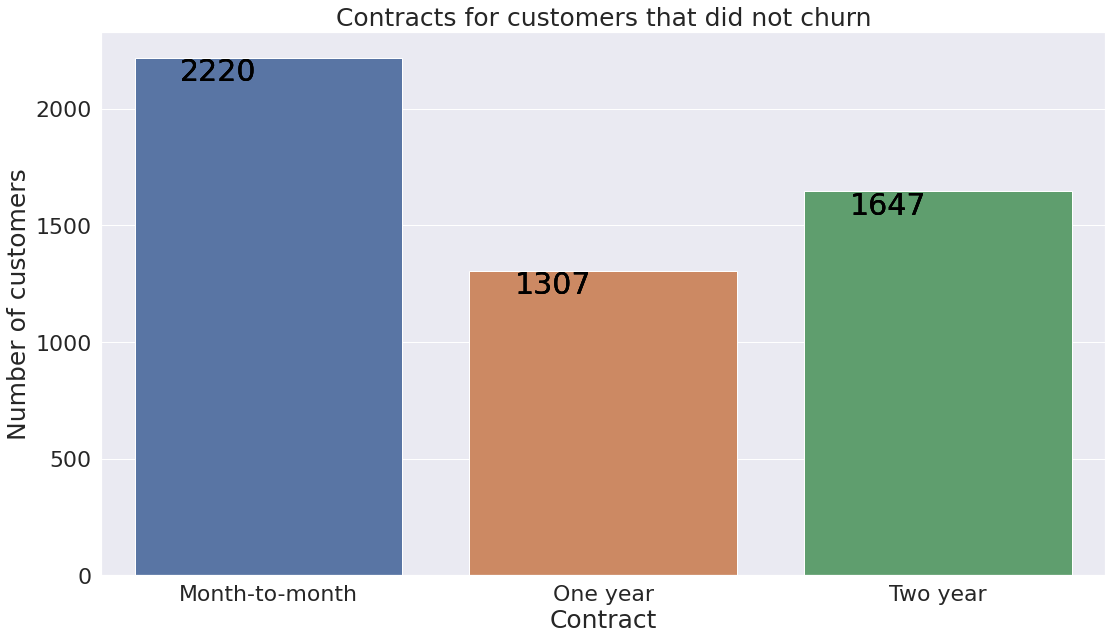

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='Contract', data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('Contracts for customers that did not churn' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

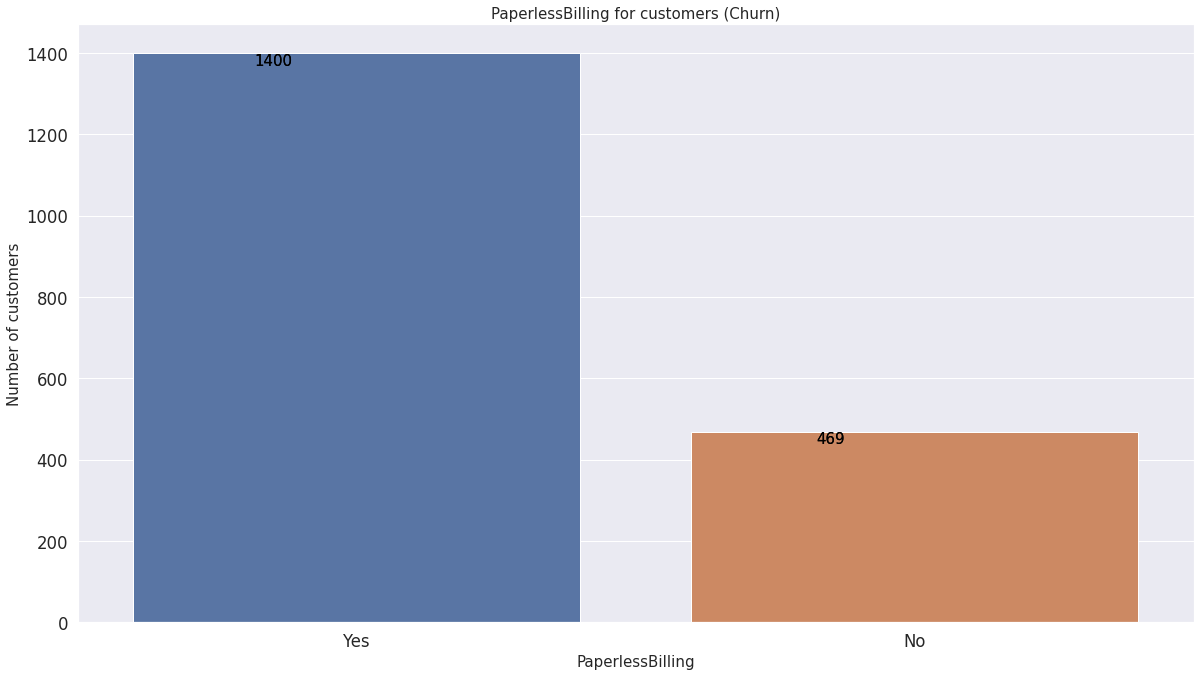

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='PaperlessBilling', data=ChurnData)
sns.set(font_scale=1.5)
ax.set_title('PaperlessBilling for customers (Churn)' , fontsize = 15)
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

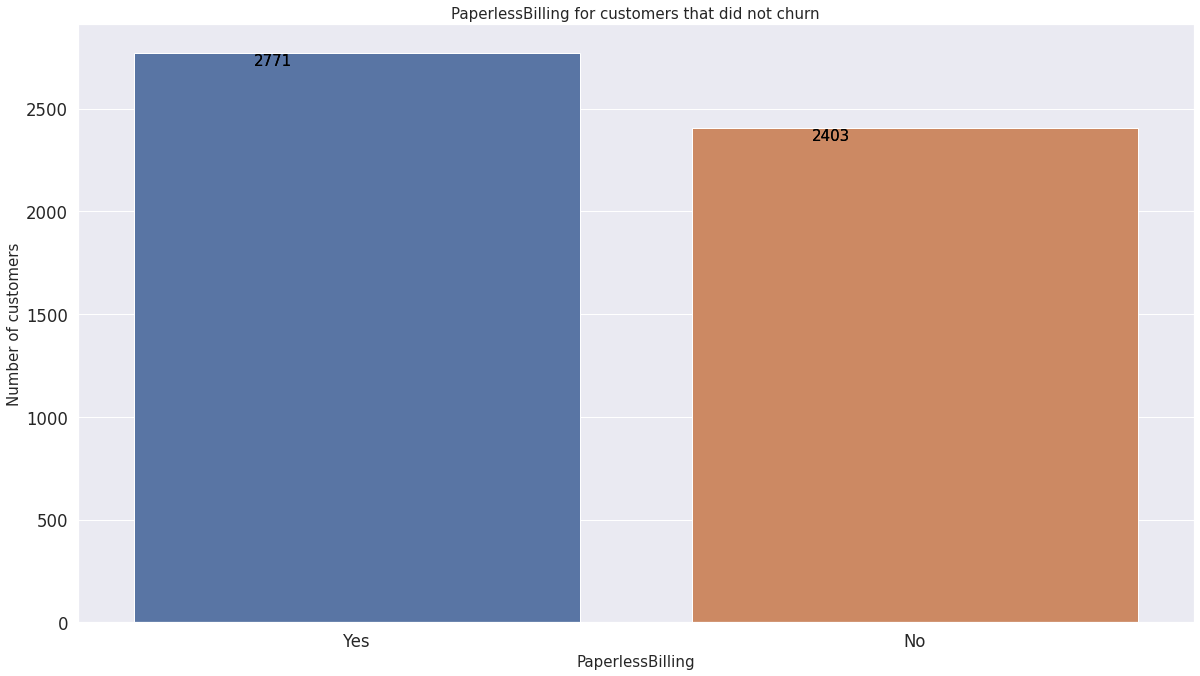

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='PaperlessBilling', data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('PaperlessBilling for customers that did not churn' , fontsize = 15)
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

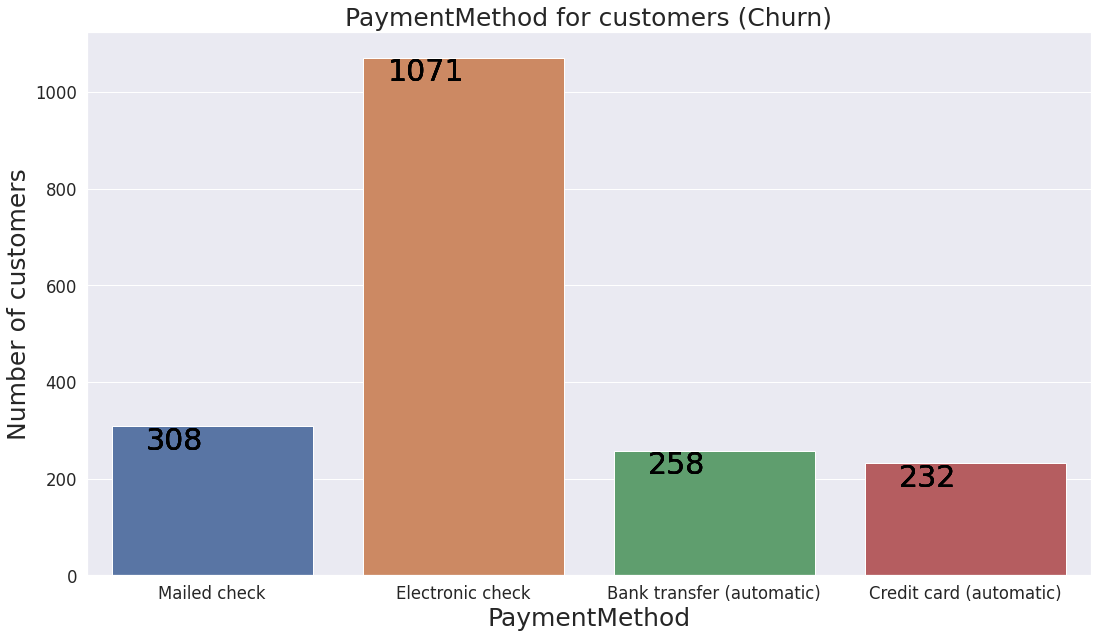

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='PaymentMethod',data=ChurnData)
sns.set(font_scale=2.0)
ax.set_title('PaymentMethod for customers (Churn)' , fontsize = 25)
plt.xlabel('PaymentMethod', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

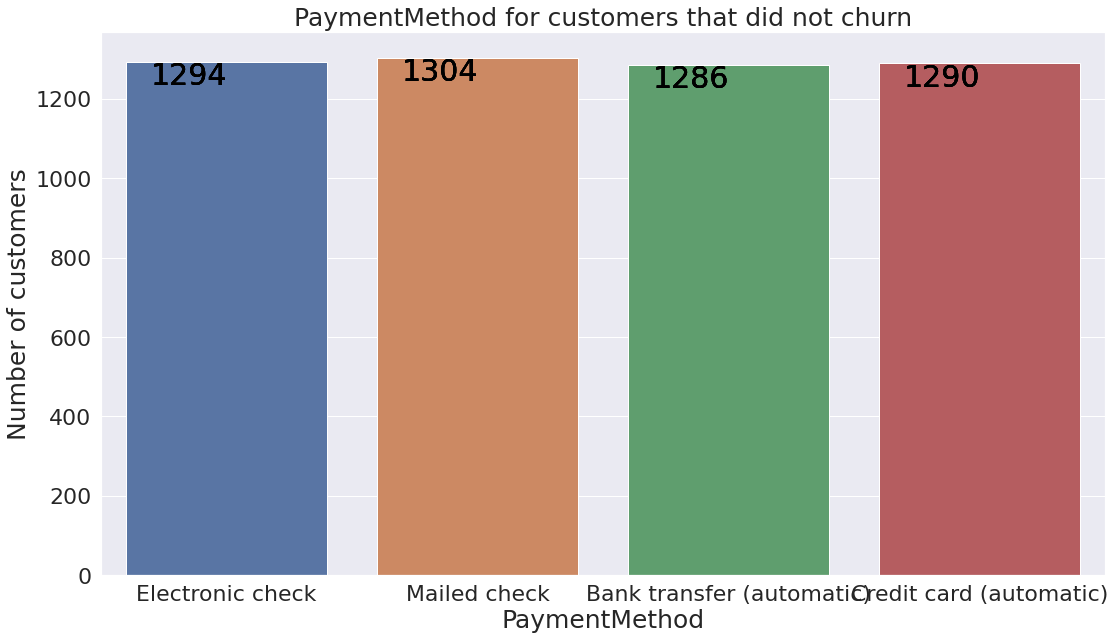

In [ ]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x='PaymentMethod',data=NotChurnData)
sns.set(font_scale=1.5)
ax.set_title('PaymentMethod for customers that did not churn' , fontsize = 25)
plt.xlabel('PaymentMethod', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=30)

In [ ]:
# To put the monthlycharges in bins
binsB = pd.cut(ChurnData['MonthlyCharges'], 10)
bins2 = pd.cut(NotChurnData['MonthlyCharges'], 10)

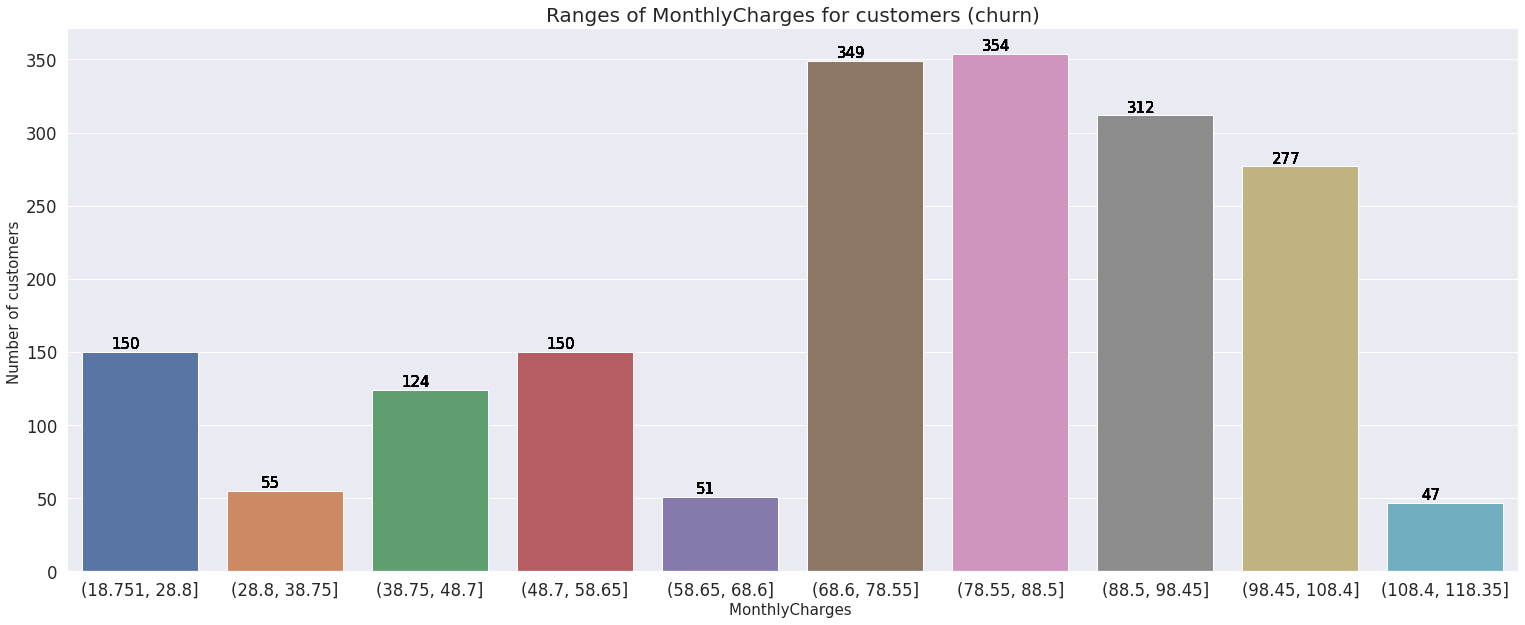

In [ ]:

plt.figure(figsize=(26,10))
sns.set(font_scale=1.5)
ax=sns.countplot(x=binsB)
ax.set_title('Ranges of MonthlyCharges for customers (churn)' , fontsize = 20)
plt.xlabel('MonthlyCharges ', fontsize=15)
plt.ylabel('Number of customers ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

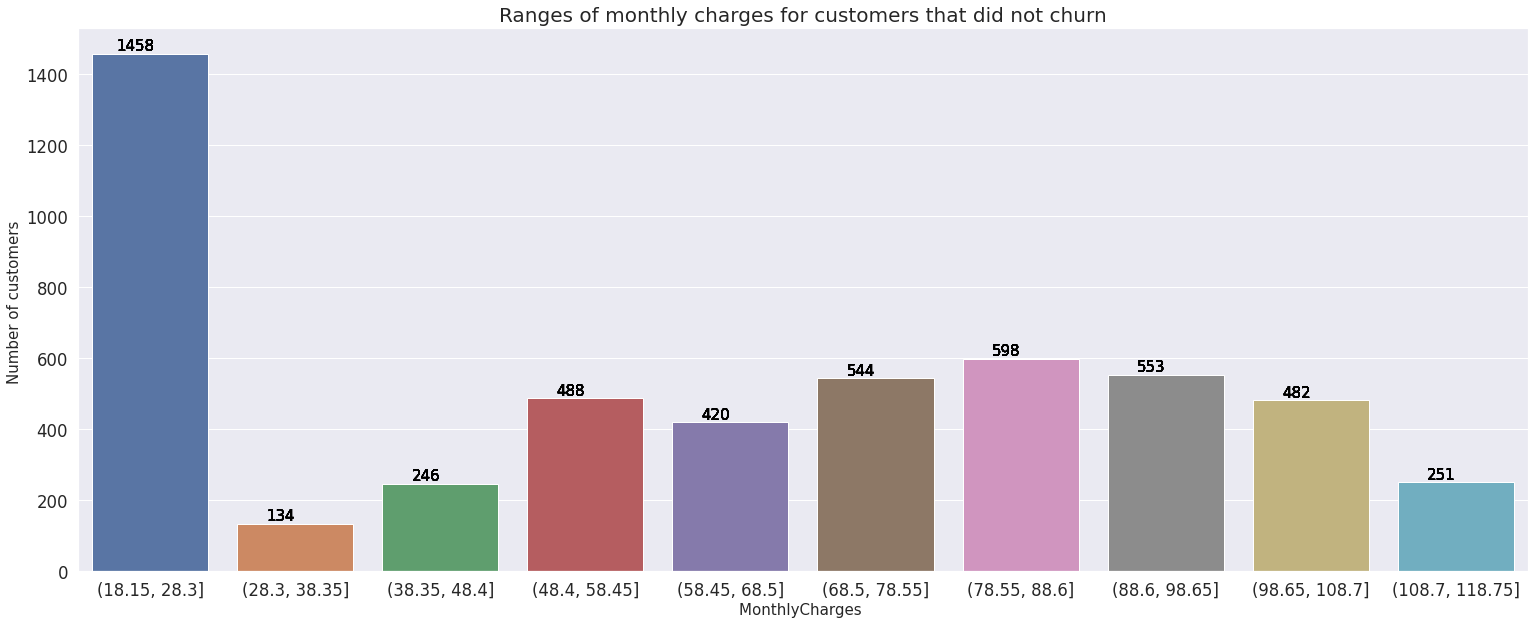

In [ ]:
plt.figure(figsize=(26,10))
sns.set(font_scale=1.5)
ax=sns.countplot(x=bins2)
ax.set_title('Ranges of monthly charges for customers that did not churn' , fontsize = 20)
plt.xlabel('MonthlyCharges ', fontsize=15)
plt.ylabel('Number of customers ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

In [ ]:
# Total charges in bins
binsC = pd.cut(ChurnData['TotalCharges'], 10)
bins3 = pd.cut(NotChurnData['TotalCharges'], 10)

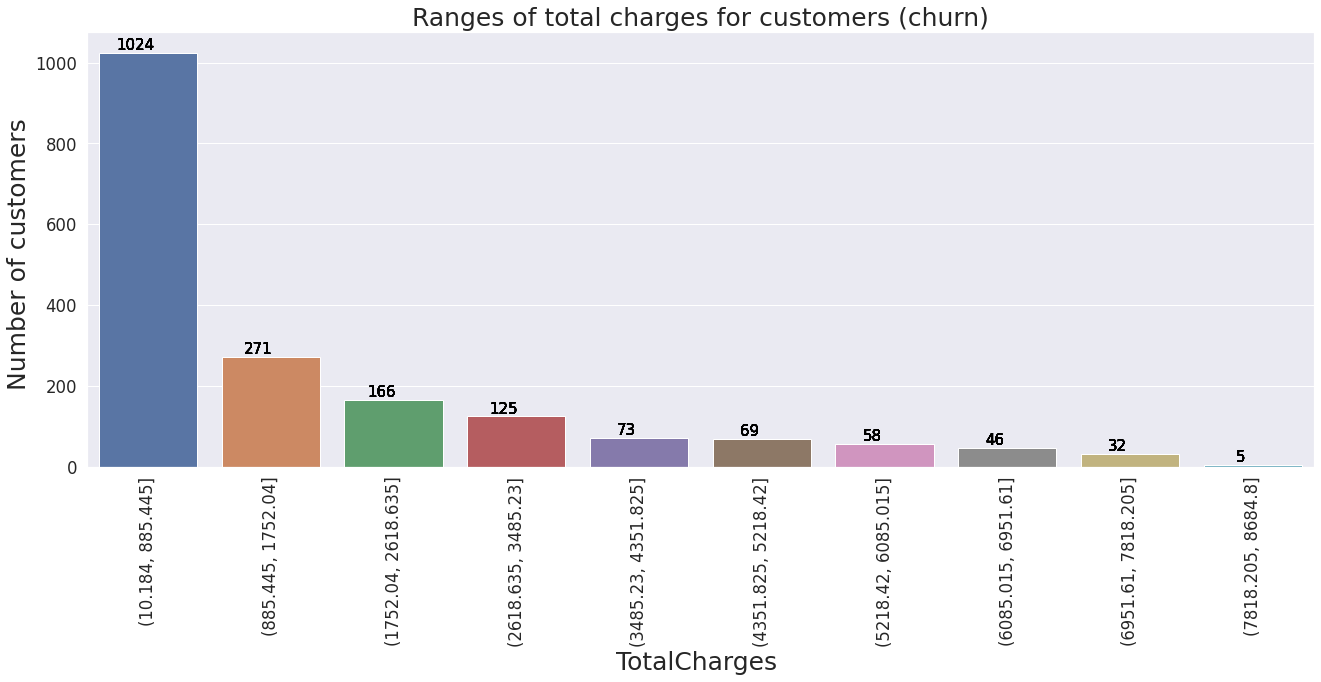

In [ ]:
plt.figure(figsize=(22,8))
sns.set(font_scale=1.5)
ax=sns.countplot(x=binsC)
ax.set_title('Ranges of total charges for customers (churn)' , fontsize = 25)
plt.xlabel('TotalCharges ', fontsize=25)
plt.ylabel('Number of customers ', fontsize=25)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

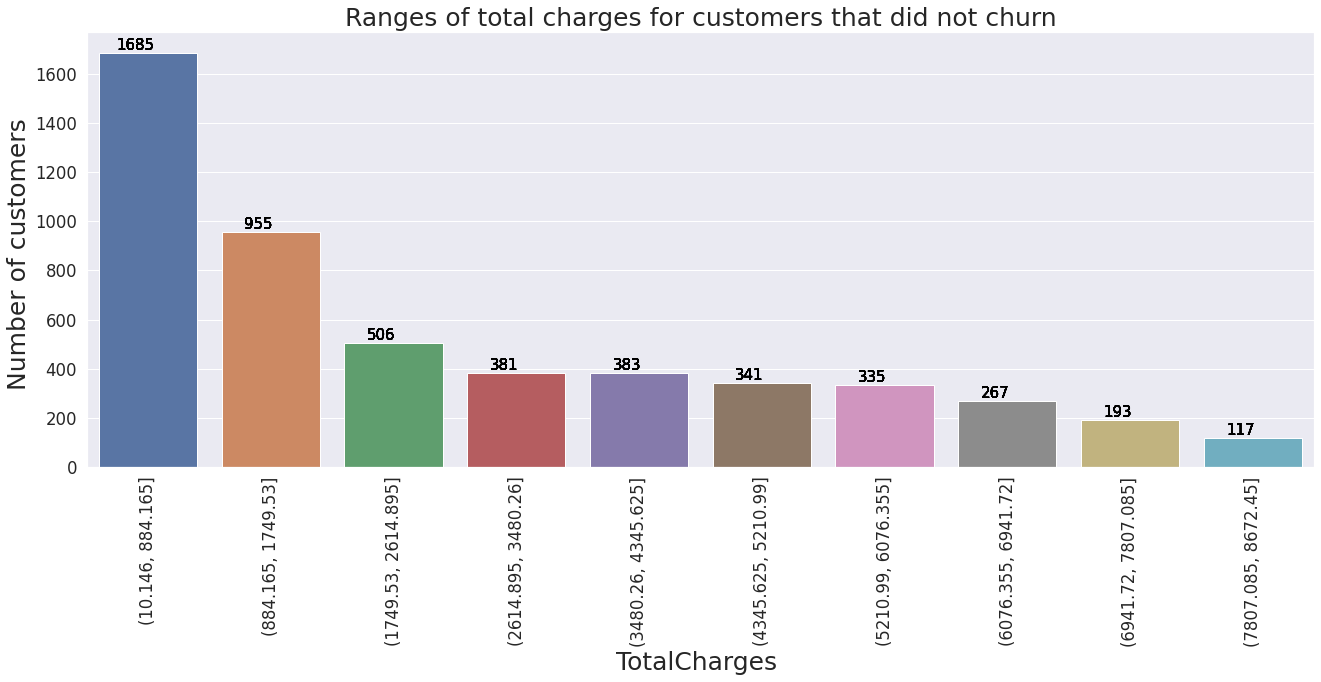

In [ ]:
plt.figure(figsize=(22,8))
sns.set(font_scale=1.5)
ax=sns.countplot(x=bins3)
ax.set_title('Ranges of total charges for customers that did not churn' , fontsize = 25)
plt.xlabel('TotalCharges ', fontsize=25)
plt.ylabel('Number of customers ', fontsize=25)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

In [ ]:
# CLUSTERING TECHNIQUE TO CONTINUE FROM HERE

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [ ]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# To drop missing values
df= df.dropna()

In [ ]:
data3 =df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
dataframe =df

In [ ]:
#Encoding
# encode categorical variables
le = LabelEncoder()

In [ ]:

# loop through each column in the dataframe
for column in dataframe.columns:
    # check if the column has object datatype (i.e. categorical)
    if dataframe[column].dtype == 'object':
        # use LabelEncoder to encode the categorical values
        dataframe[column] = le.fit_transform(dataframe[column])


<ipython-input-219-4abe45ab18b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = le.fit_transform(dataframe[column])
<ipython-input-219-4abe45ab18b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = le.fit_transform(dataframe[column])
<ipython-input-219-4abe45ab18b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
dataframe.head()


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5365       0              0        1           0       1   
1        3953       1              0        0           0      34   
2        2558       1              0        0           0       2   
3        5524       1              0        0           0      45   
4        6500       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1  

[5 rows x 21 columns]

In [ ]:
dataframe = dataframe.drop('customerID', axis=1)


In [ ]:
dataframe = dataframe.drop('Churn', axis=1)

In [ ]:
X = dataframe.values

In [ ]:
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

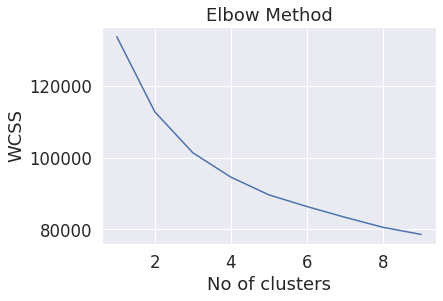

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#From the elbow method above, the optimal number of clusters to be used is 3
kmeans = KMeans(n_clusters= 2, init='k-means++', random_state = 35)
y_means= kmeans.fit_predict (X)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_means

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:

# We need to reduce the dimensionality before we can visualize
# The explained ratio tells us how much is compressed into the first few components. We use this to calculate the cummulative variance
# The cummulative variance should be minimum of 70%. Meaning the decomposed data has minimum of 70% of information of the original data
# We don't want all of the information because some of them are noise
from sklearn import decomposition
from sklearn.decomposition import PCA
pca = decomposition.PCA()
X_decomp = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.22249734, 0.1218598 , 0.07875656, 0.06394512, 0.05668375,
       0.05272684, 0.04976897, 0.04542665, 0.04272823, 0.04089064,
       0.03778958, 0.03690806, 0.03606025, 0.02997123, 0.029608  ,
       0.02464656, 0.01659734, 0.01033033, 0.00280475])

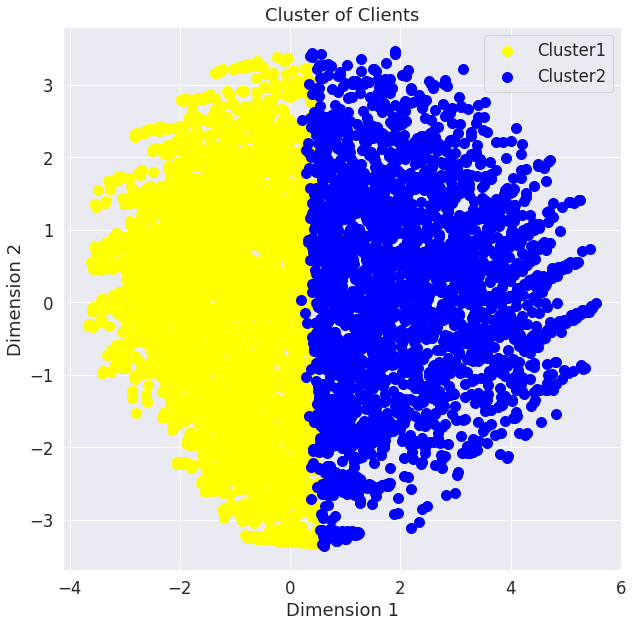

In [ ]:
#Visualize the cluster
color_list = ['yellow','blue']
plt.figure(figsize=(10,10))
for i in range(2):
    plt.scatter(X_decomp[y_means== i, 0], X_decomp[y_means== i, 1], s=100, c = color_list[i], label ='Cluster'+ str(i+1))
plt.title('Cluster of Clients')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
#Evaluating performance of the model
print(silhouette_score(X, y_means))
print(davies_bouldin_score(X, y_means))
print(calinski_harabasz_score(X, y_means))

0.15708950881682246
2.2545066295692724
1304.314247395666


In [ ]:
#using number of clusters =3
# Fit KMeans to the dataset
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state = 35)
y_means_2= kmeans.fit_predict (X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_means_2

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

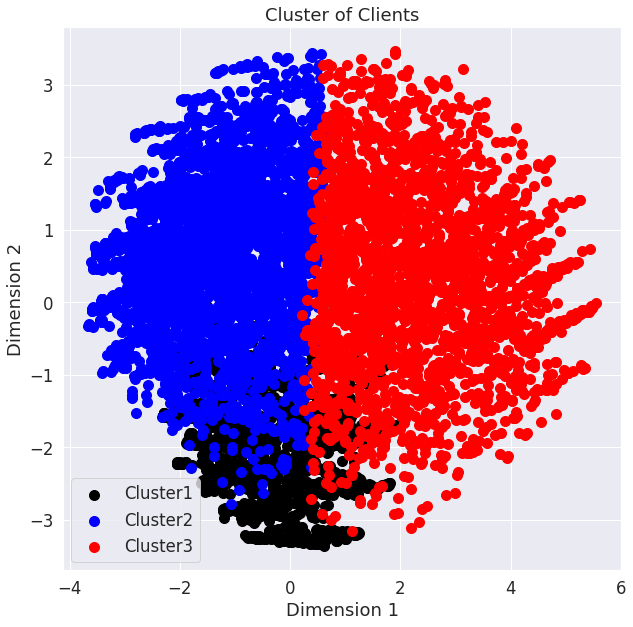

In [ ]:
#Visualize the cluster
color_list = ['black','blue','red']
plt.figure(figsize=(10,10))

for i in range(3):
    plt.scatter(X_decomp[y_means_2== i, 0], X_decomp[y_means_2== i, 1], s=100, c = color_list[i], label ='Cluster'+ str(i+1))
plt.title('Cluster of Clients')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [ ]:
print(silhouette_score(X, y_means_2))
print(davies_bouldin_score(X, y_means_2))
print(calinski_harabasz_score(X, y_means_2))

0.13811226908613305
2.032347692884629
1120.6313197199052


In [ ]:
#Smaller DB Index is better
#Higher value for Calinski Harabaz index shows better performance
#The higher the Silhouette Coefficients (the closer to +1), the more is the separation between clusters

In [ ]:
y_means

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
y =9


In [ ]:
clusterDF=pd.DataFrame(y_means,columns=['Clusters'] )

In [ ]:
clusterDF.head(10)

Clusters
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         1

In [ ]:
segmentationDF=pd.concat([data3 ,clusterDF], axis=1)

In [ ]:
segmentationDF.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0      5365.0     0.0            0.0      1.0         0.0     1.0   
1      3953.0     1.0            0.0      0.0         0.0    34.0   
2      2558.0     1.0            0.0      0.0         0.0     2.0   
3      5524.0     1.0            0.0      0.0         0.0    45.0   
4      6500.0     0.0            0.0      0.0         0.0     2.0   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0           0.0            1.0              0.0             0.0  ...   
1           1.0            0.0              0.0             2.0  ...   
2           1.0            0.0              0.0             2.0  ...   
3           0.0            1.0              0.0             2.0  ...   
4           1.0            0.0              1.0             0.0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0          0.0          0.0              0.0       0.0               1.0   
1          0.0          0.0              0.0       1.0               0.0   
2          0.0          0.0              0.0       0.0               1.0   
3          2.0          0.0              0.0       1.0               0.0   
4          0.0          0.0              0.0       0.0               1.0   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  Clusters  
0            2.0           29.85         29.85    0.0       0.0  
1            3.0           56.95       1889.50    0.0       0.0  
2            3.0           53.85        108.15    1.0       0.0  
3            0.0           42.30       1840.75    0.0       0.0  
4            2.0           70.70        151.65    1.0       0.0  

[5 rows x 22 columns]

In [ ]:
segmentationDF=pd.concat([data3 ,clusterDF], axis=1)

In [ ]:
data=data.dropna()

In [ ]:
#Concat the clustering dataframe and original dataframe

In [ ]:
segDF=pd.concat([data ,clusterDF], axis=1)

In [ ]:
segDF.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1  5575-GNVDE    Male            0.0      No         No    34.0          Yes   
2  3668-QPYBK    Male            0.0      No         No     2.0          Yes   
3  7795-CFOCW    Male            0.0      No         No    45.0           No   
4  9237-HQITU  Female            0.0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  Clusters  
0           Electronic check          29.85        29.85     No       0.0  
1               Mailed check          56.95      1889.50     No       0.0  
2               Mailed check          53.85       108.15    Yes       0.0  
3  Bank transfer (automatic)          42.30      1840.75     No       0.0  
4           Electronic check          70.70       151.65    Yes       0.0  

[5 rows x 22 columns]

In [ ]:
segDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 6754
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   float64
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
#Extracting those customers that belong to cluster 0
segment_1 = segDF.loc[(segDF['Clusters']==0)]
segment_1.head()
segment_1.shape

(4320, 22)

In [ ]:
#Extracting those customers that belong to cluster 0
segment_2 = segDF.loc[(segDF['Clusters']==1)]
segment_2.head()
segment_2.shape

(2712, 22)

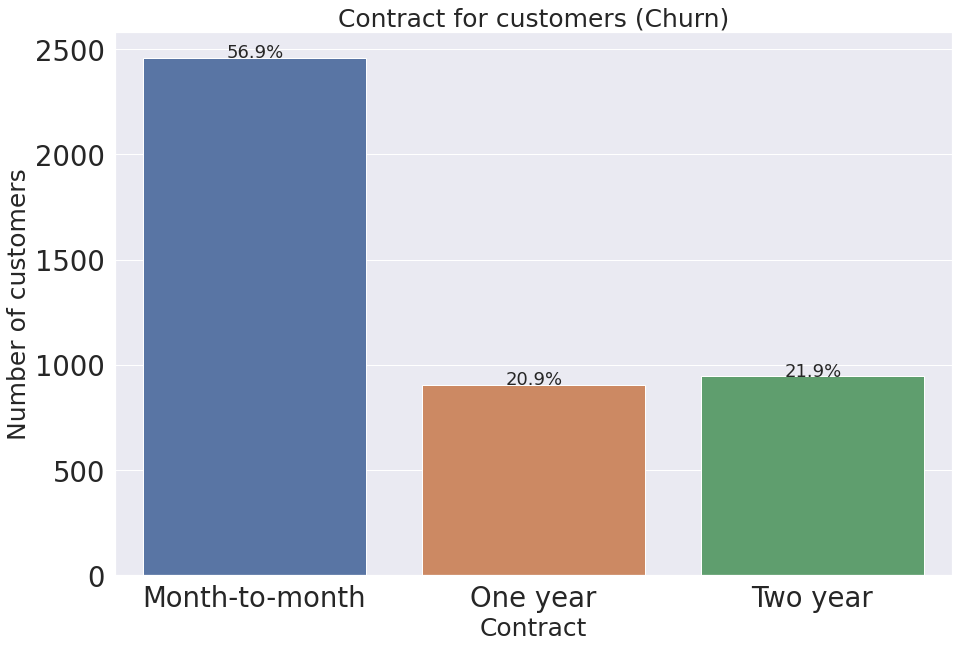

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Contract', data=segment_1)
sns.set(font_scale=2.5)
ax.set_title('Contract for customers (Churn)' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(segment_1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

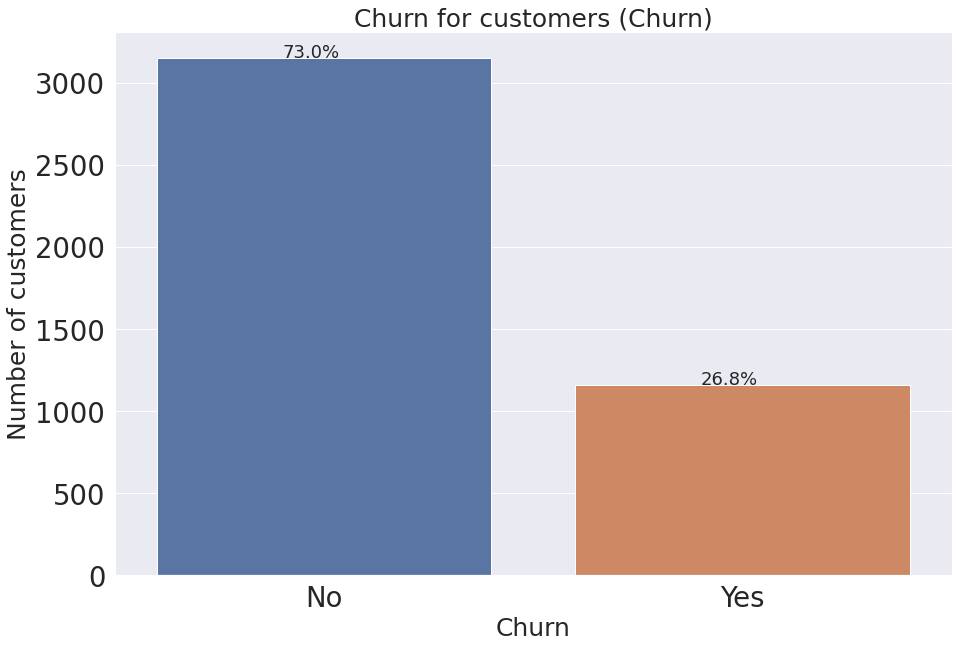

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Churn', data=segment_1)
sns.set(font_scale=2.5)
ax.set_title('Churn for customers (Churn)' , fontsize = 25)
plt.xlabel('Churn', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(segment_1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

In [ ]:
segment_1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1  5575-GNVDE    Male            0.0      No         No    34.0          Yes   
2  3668-QPYBK    Male            0.0      No         No     2.0          Yes   
3  7795-CFOCW    Male            0.0      No         No    45.0           No   
4  9237-HQITU  Female            0.0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  Clusters  
0           Electronic check          29.85        29.85     No       0.0  
1               Mailed check          56.95      1889.50     No       0.0  
2               Mailed check          53.85       108.15    Yes       0.0  
3  Bank transfer (automatic)          42.30      1840.75     No       0.0  
4           Electronic check          70.70       151.65    Yes       0.0  

[5 rows x 22 columns]

In [ ]:
segment_1["Churn"].value_counts(normalize=True)

No     0.731215
Yes    0.268785
Name: Churn, dtype: float64

In [ ]:
segment_2["Churn"].value_counts(normalize=True)

No     0.739018
Yes    0.260982
Name: Churn, dtype: float64

In [ ]:
# Segment 2

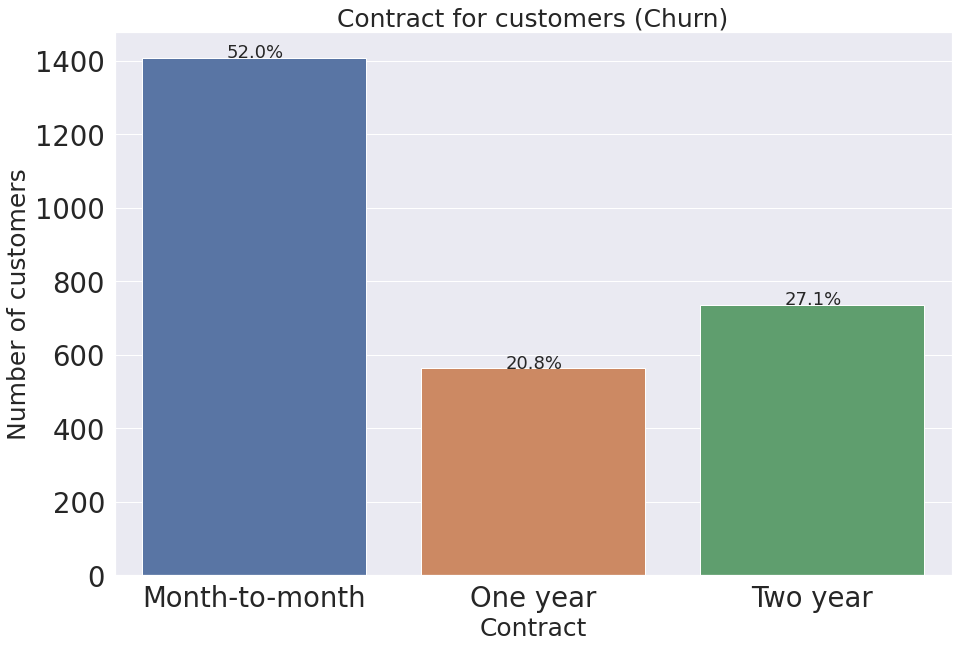

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Contract', data=segment_2)
sns.set(font_scale=2.5)
ax.set_title('Contract for customers (Churn)' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(segment_2))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

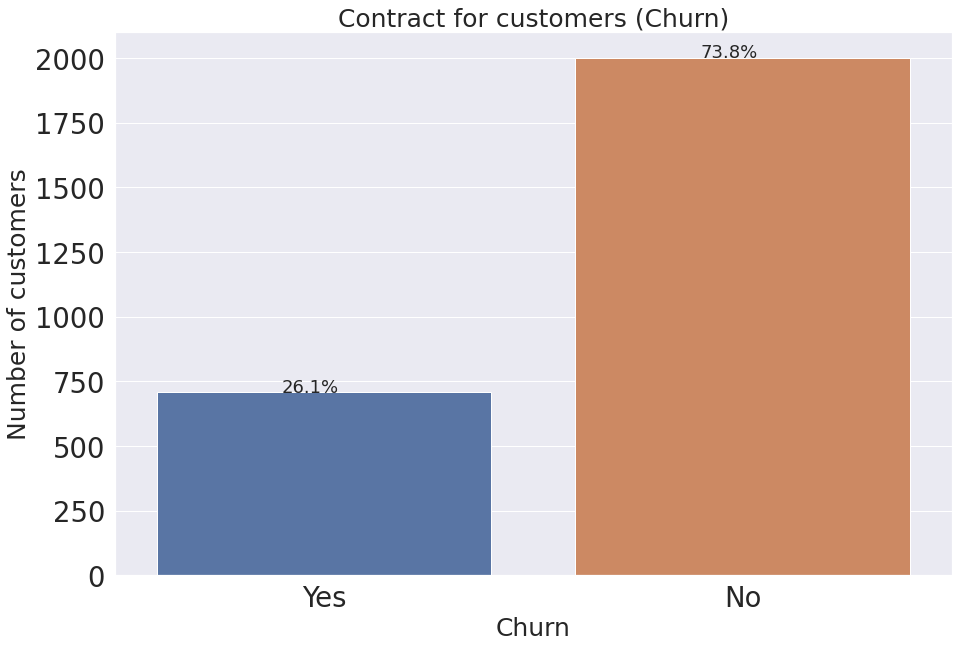

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Churn', data=segment_2)
sns.set(font_scale=2.5)
ax.set_title('Contract for customers (Churn)' , fontsize = 25)
plt.xlabel('Churn', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(segment_2))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

In [ ]:
segment_2["Churn"].value_counts(normalize=True)

No     0.739018
Yes    0.260982
Name: Churn, dtype: float64

In [ ]:
segment_1["Churn"].value_counts(normalize=True)

No     0.731215
Yes    0.268785
Name: Churn, dtype: float64

In [ ]:
# Using the churn data for clustering

In [ ]:
dataKeep = df

In [ ]:
df.shape

(7043, 21)

In [ ]:
#Churn data
churnDf = df[df["Churn"]=="Yes"]
churnDf.shape


(1869, 21)

In [ ]:
#Churn data
NochurnDf = df[df["Churn"]=="No"]
NochurnDf.shape

(5174, 21)

In [ ]:
churnDf["Churn"].value_counts(normalize=True)

Yes    1.0
Name: Churn, dtype: float64

In [ ]:
churnDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1869 non-null   object 
 1   gender            1869 non-null   object 
 2   SeniorCitizen     1869 non-null   int64  
 3   Partner           1869 non-null   object 
 4   Dependents        1869 non-null   object 
 5   tenure            1869 non-null   int64  
 6   PhoneService      1869 non-null   object 
 7   MultipleLines     1869 non-null   object 
 8   InternetService   1869 non-null   object 
 9   OnlineSecurity    1869 non-null   object 
 10  OnlineBackup      1869 non-null   object 
 11  DeviceProtection  1869 non-null   object 
 12  TechSupport       1869 non-null   object 
 13  StreamingTV       1869 non-null   object 
 14  StreamingMovies   1869 non-null   object 
 15  Contract          1869 non-null   object 
 16  PaperlessBilling  1869 non-null   object 


In [ ]:
# Add this later
churnDf.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2   3668-QPYBK    Male              0      No         No       2          Yes   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
2             No             DSL            Yes  ...               No   
4             No     Fiber optic             No  ...               No   
5            Yes     Fiber optic             No  ...              Yes   
8            Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
2           No          No              No  Month-to-month              Yes   
4           No          No              No  Month-to-month              Yes   
5           No         Yes             Yes  Month-to-month              Yes   
8          Yes         Yes             Yes  Month-to-month              Yes   
13          No         Yes             Yes  Month-to-month              Yes   

                PaymentMethod MonthlyCharges  TotalCharges  Churn  
2                Mailed check          53.85        108.15    Yes  
4            Electronic check          70.70        151.65    Yes  
5            Electronic check          99.65        820.50    Yes  
8            Electronic check         104.80       3046.05    Yes  
13  Bank transfer (automatic)         103.70       5036.30    Yes  

[5 rows x 21 columns]

In [ ]:


churnDf2 = churnDf.drop(['customerID','Churn'], axis=1)
churnDf2.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2     Male              0      No         No       2          Yes   
4   Female              0      No         No       2          Yes   
5   Female              0      No         No       8          Yes   
8   Female              0     Yes         No      28          Yes   
13    Male              0      No         No      49          Yes   

   MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
2             No             DSL            Yes          Yes               No   
4             No     Fiber optic             No           No               No   
5            Yes     Fiber optic             No           No              Yes   
8            Yes     Fiber optic             No           No              Yes   
13           Yes     Fiber optic             No          Yes              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
2           No          No              No  Month-to-month              Yes   
4           No          No              No  Month-to-month              Yes   
5           No         Yes             Yes  Month-to-month              Yes   
8          Yes         Yes             Yes  Month-to-month              Yes   
13          No         Yes             Yes  Month-to-month              Yes   

                PaymentMethod  MonthlyCharges  TotalCharges  
2                Mailed check           53.85        108.15  
4            Electronic check           70.70        151.65  
5            Electronic check           99.65        820.50  
8            Electronic check          104.80       3046.05  
13  Bank transfer (automatic)          103.70       5036.30

In [ ]:
churnDf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1869 non-null   object 
 1   SeniorCitizen     1869 non-null   int64  
 2   Partner           1869 non-null   object 
 3   Dependents        1869 non-null   object 
 4   tenure            1869 non-null   int64  
 5   PhoneService      1869 non-null   object 
 6   MultipleLines     1869 non-null   object 
 7   InternetService   1869 non-null   object 
 8   OnlineSecurity    1869 non-null   object 
 9   OnlineBackup      1869 non-null   object 
 10  DeviceProtection  1869 non-null   object 
 11  TechSupport       1869 non-null   object 
 12  StreamingTV       1869 non-null   object 
 13  StreamingMovies   1869 non-null   object 
 14  Contract          1869 non-null   object 
 15  PaperlessBilling  1869 non-null   object 
 16  PaymentMethod     1869 non-null   object 


In [ ]:
#Encoding
# encode categorical variables
le = LabelEncoder()

# loop through each column in the dataframe
for column in churnDf2.columns:
    # check if the column has object datatype (i.e. categorical)
    if churnDf2[column].dtype == 'object':
        # use LabelEncoder to encode the categorical values
        churnDf2[column] = le.fit_transform(churnDf2[column])

# Use this churn data for clustering
x = churnDf2.values


standardizer = StandardScaler()
x = standardizer.fit_transform(x)


from sklearn.cluster import KMeans
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()


#From the elbow method above, the optimal number of clusters to be used is 2
kmeans = KMeans(n_clusters= 2, init='k-means++', random_state = 35)
y_means= kmeans.fit_predict (x)

y_means

from sklearn import decomposition
from sklearn.decomposition import PCA
pca = decomposition.PCA()
X_decomp = pca.fit_transform(x)
pca.explained_variance_ratio_

#Visualize the cluster
color_list = ['red','blue']
plt.figure(figsize=(10,10))
for i in range(2):
    plt.scatter(X_decomp[y_means== i, 0], X_decomp[y_means== i, 1], s=100, c = color_list[i], label ='Cluster'+ str(i+1))
plt.title('Cluster of Clients')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [ ]:
# loop through each column in the dataframe
for column in churnDf2.columns:
    # check if the column has object datatype (i.e. categorical)
    if churnDf2[column].dtype == 'object':
        # use LabelEncoder to encode the categorical values
        churnDf2[column] = le.fit_transform(churnDf2[column])

In [ ]:
# Use this churn data for clustering
x = churnDf2.values

In [ ]:
standardizer = StandardScaler()
x = standardizer.fit_transform(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

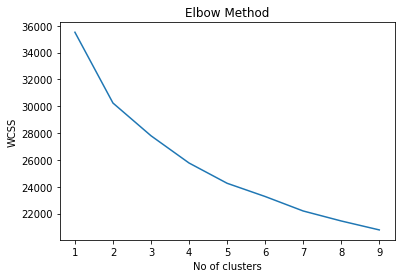

In [ ]:

from sklearn.cluster import KMeans
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


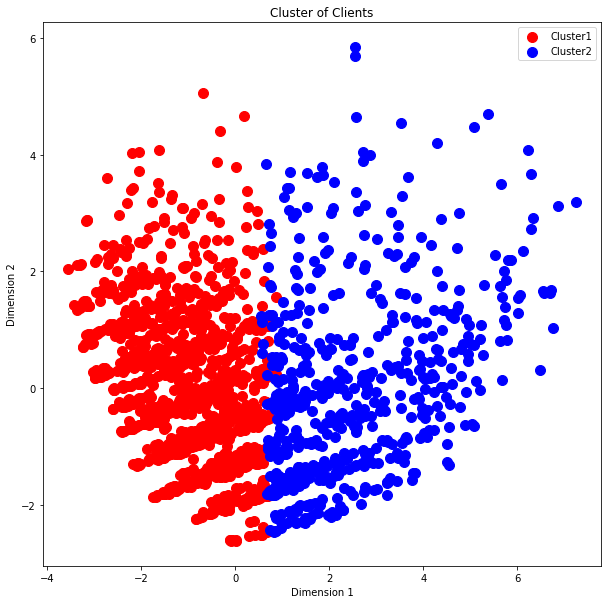

In [ ]:
#From the elbow method above, the optimal number of clusters to be used is 2
kmeans = KMeans(n_clusters= 2, init='k-means++', random_state = 35)
y_means= kmeans.fit_predict (x)

y_means

from sklearn import decomposition
from sklearn.decomposition import PCA
pca = decomposition.PCA()
X_decomp = pca.fit_transform(x)
pca.explained_variance_ratio_

#Visualize the cluster
color_list = ['red','blue']
plt.figure(figsize=(10,10))
for i in range(2):
    plt.scatter(X_decomp[y_means== i, 0], X_decomp[y_means== i, 1], s=100, c = color_list[i], label ='Cluster'+ str(i+1))
plt.title('Cluster of Clients')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [ ]:
set(y_means)

{0, 1}

In [ ]:
cluster=pd.DataFrame(y_means,columns=['Clusters'] )

In [ ]:
cluster.shape

(1869, 1)

In [ ]:
cluster.tail()

Clusters
1864         0
1865         0
1866         0
1867         1
1868         0

In [ ]:
cluster.head()

Clusters
0         0
1         0
2         0
3         1
4         1

In [ ]:
cluster.isna().sum()

Clusters    0
dtype: int64

In [ ]:
churnDf.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7021  1699-HPSBG    Male              0      No         No      12   
7026  8775-CEBBJ  Female              0      No         No       9   
7032  6894-LFHLY    Male              1      No         No       1   
7034  0639-TSIQW  Female              0      No         No      67   
7041  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
7021          Yes            No             DSL             No  ...   
7026          Yes            No             DSL             No  ...   
7032          Yes           Yes     Fiber optic             No  ...   
7034          Yes           Yes     Fiber optic            Yes  ...   
7041          Yes           Yes     Fiber optic             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7021               No         Yes         Yes              No        One year   
7026               No          No          No              No  Month-to-month   
7032               No          No          No              No  Month-to-month   
7034              Yes          No         Yes              No  Month-to-month   
7041               No          No          No              No  Month-to-month   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7021              Yes           Electronic check          59.80        727.80   
7026              Yes  Bank transfer (automatic)          44.20        403.35   
7032              Yes           Electronic check          75.75         75.75   
7034              Yes    Credit card (automatic)         102.95       6886.25   
7041              Yes               Mailed check          74.40        306.60   

      Churn  
7021    Yes  
7026    Yes  
7032    Yes  
7034    Yes  
7041    Yes  

[5 rows x 21 columns]

In [ ]:
churnDf.shape

(1869, 21)

In [ ]:
# To add both dataframes
result = churnDf.join(cluster)

In [ ]:
clusterdf=cluster

In [ ]:
result.shape

(1869, 22)

In [ ]:
churnDfA = churnDf
clusterA = cluster

In [ ]:
import pandas as pd



# use reset_index() to align the indices of df1 and df2
churnDfA = churnDfA.reset_index(drop=True)
clusterA = clusterA.reset_index(drop=True)

# concatenate df2 to df1 using concat()
resultAB = pd.concat([churnDfA, clusterA], axis=1)

# print the resulting dataframe
print(resultAB)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     3668-QPYBK    Male              0      No         No       2   
1     9237-HQITU  Female              0      No         No       2   
2     9305-CDSKC  Female              0      No         No       8   
3     7892-POOKP  Female              0     Yes         No      28   
4     0280-XJGEX    Male              0      No         No      49   
...          ...     ...            ...     ...        ...     ...   
1864  1699-HPSBG    Male              0      No         No      12   
1865  8775-CEBBJ  Female              0      No         No       9   
1866  6894-LFHLY    Male              1      No         No       1   
1867  0639-TSIQW  Female              0      No         No      67   
1868  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0             Yes            No             DSL            Yes  ...   
1             Yes

In [ ]:
resultAB.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  3668-QPYBK    Male              0      No         No       2          Yes   
1  9237-HQITU  Female              0      No         No       2          Yes   
2  9305-CDSKC  Female              0      No         No       8          Yes   
3  7892-POOKP  Female              0     Yes         No      28          Yes   
4  0280-XJGEX    Male              0      No         No      49          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No             DSL            Yes  ...          No          No   
1            No     Fiber optic             No  ...          No          No   
2           Yes     Fiber optic             No  ...          No         Yes   
3           Yes     Fiber optic             No  ...         Yes         Yes   
4           Yes     Fiber optic             No  ...          No         Yes   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes               Mailed check   
1              No  Month-to-month              Yes           Electronic check   
2             Yes  Month-to-month              Yes           Electronic check   
3             Yes  Month-to-month              Yes           Electronic check   
4             Yes  Month-to-month              Yes  Bank transfer (automatic)   

  MonthlyCharges TotalCharges  Churn  Clusters  
0          53.85       108.15    Yes         0  
1          70.70       151.65    Yes         0  
2          99.65       820.50    Yes         0  
3         104.80      3046.05    Yes         1  
4         103.70      5036.30    Yes         1  

[5 rows x 22 columns]

In [ ]:

resultAB["Clusters"].value_counts(normalize= True)

0    0.695024
1    0.304976
Name: Clusters, dtype: float64

In [ ]:
FirstSegment = resultAB[resultAB["Clusters"]==0]
FirstSegment.head()
FirstSegment.shape

(1299, 22)

In [ ]:
SecondSegment =  resultAB[resultAB["Clusters"]==1]


In [ ]:
SecondSegment.head()
SecondSegment.shape

(570, 22)

In [ ]:
# FirstSegment pattern is most important

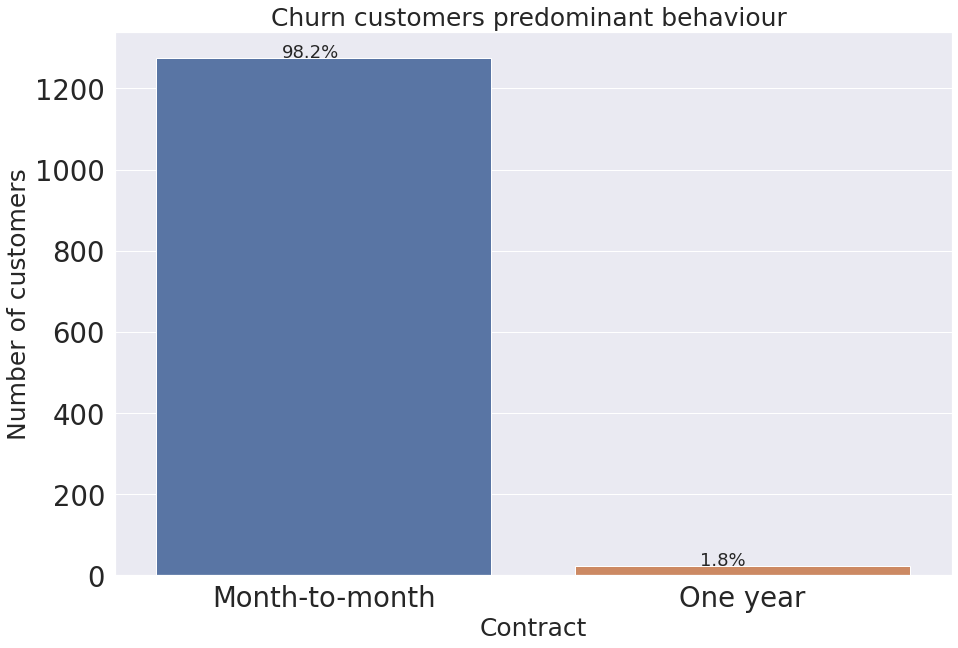

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Contract', data=FirstSegment)
sns.set(font_scale=2.5)
ax.set_title('Churn customers predominant behaviour ' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(FirstSegment))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

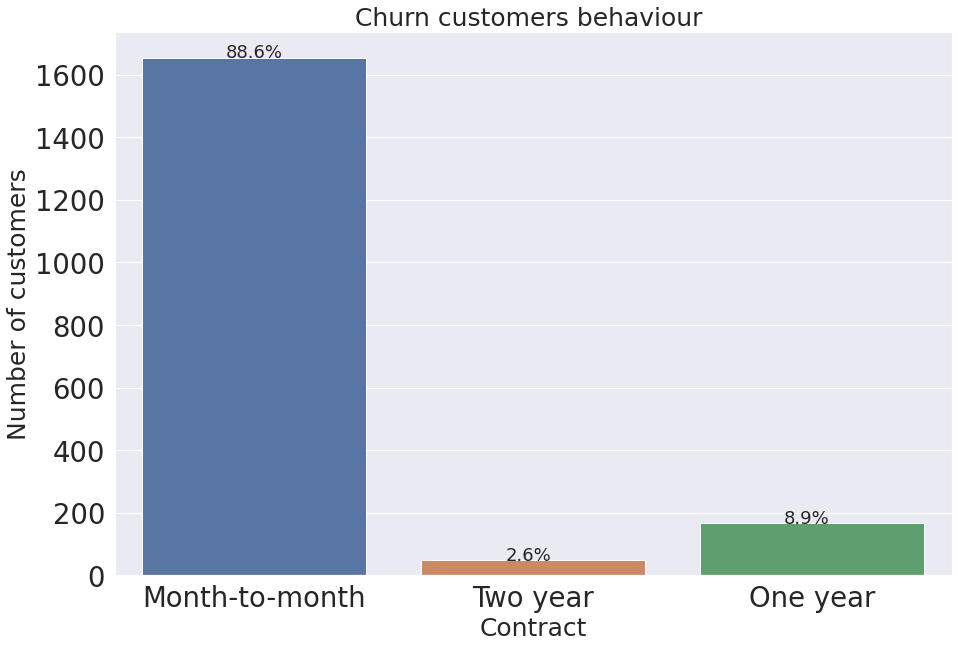

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Contract', data=resultAB)
sns.set(font_scale=2.5)
ax.set_title('Churn customers behaviour ' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(resultAB))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

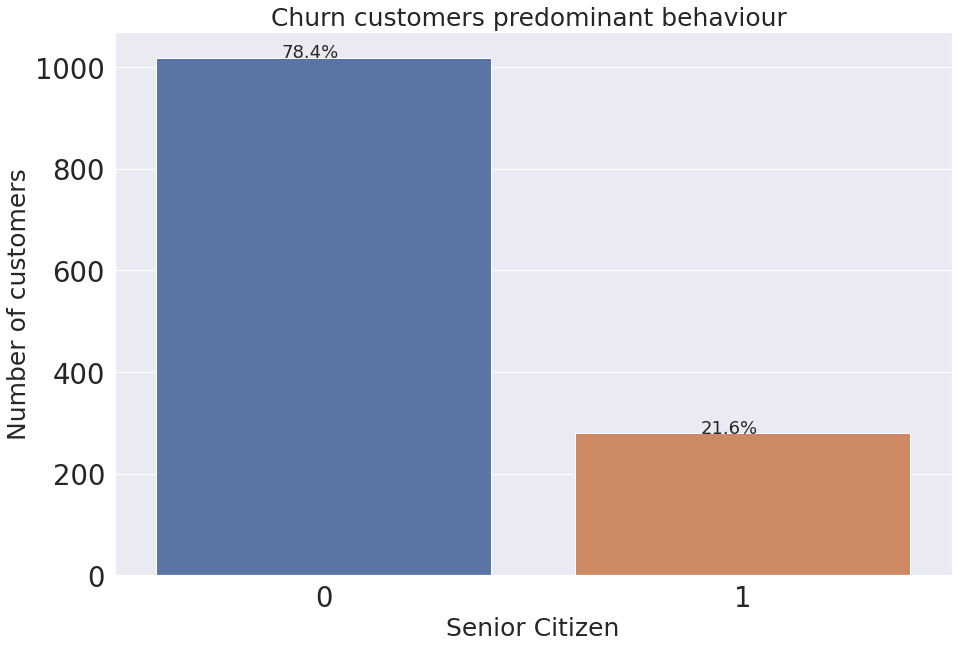

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='SeniorCitizen', data=FirstSegment)
sns.set(font_scale=2.5)
ax.set_title('Churn customers predominant behaviour ' , fontsize = 25)
plt.xlabel('Senior Citizen', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(FirstSegment))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

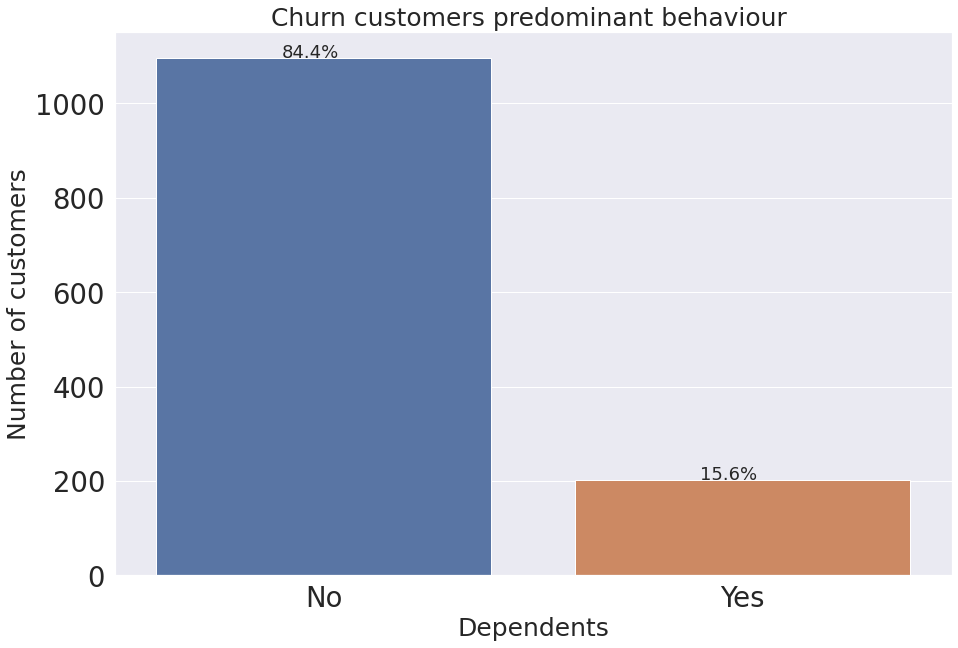

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Dependents', data=FirstSegment)
sns.set(font_scale=2.5)
ax.set_title('Churn customers predominant behaviour ' , fontsize = 25)
plt.xlabel('Dependents', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(FirstSegment))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

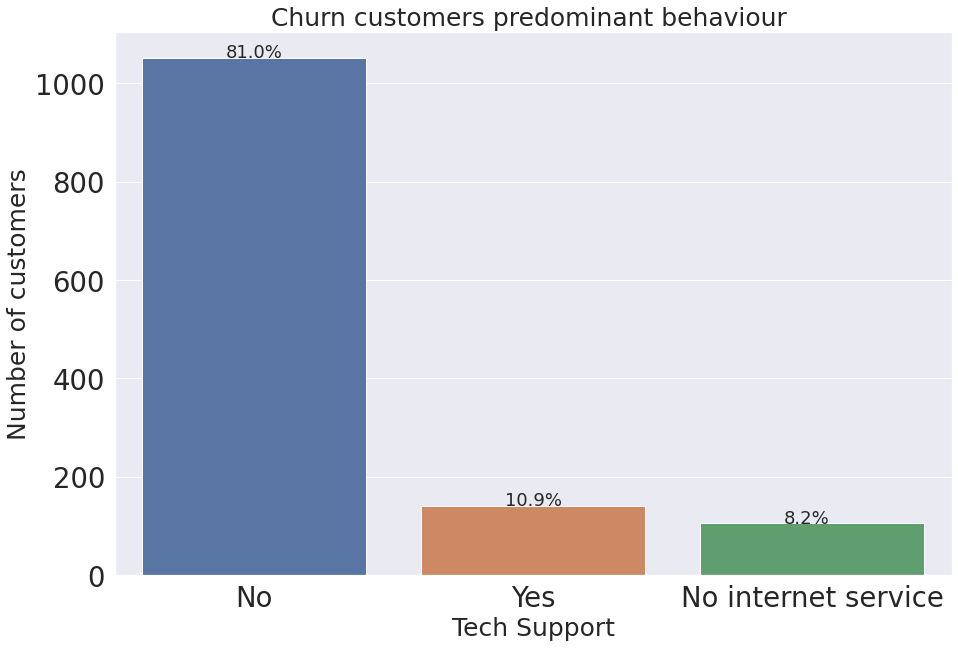

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='TechSupport', data=FirstSegment)
sns.set(font_scale=2.5)
ax.set_title('Churn customers predominant behaviour ' , fontsize = 25)
plt.xlabel('Tech Support', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(FirstSegment))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

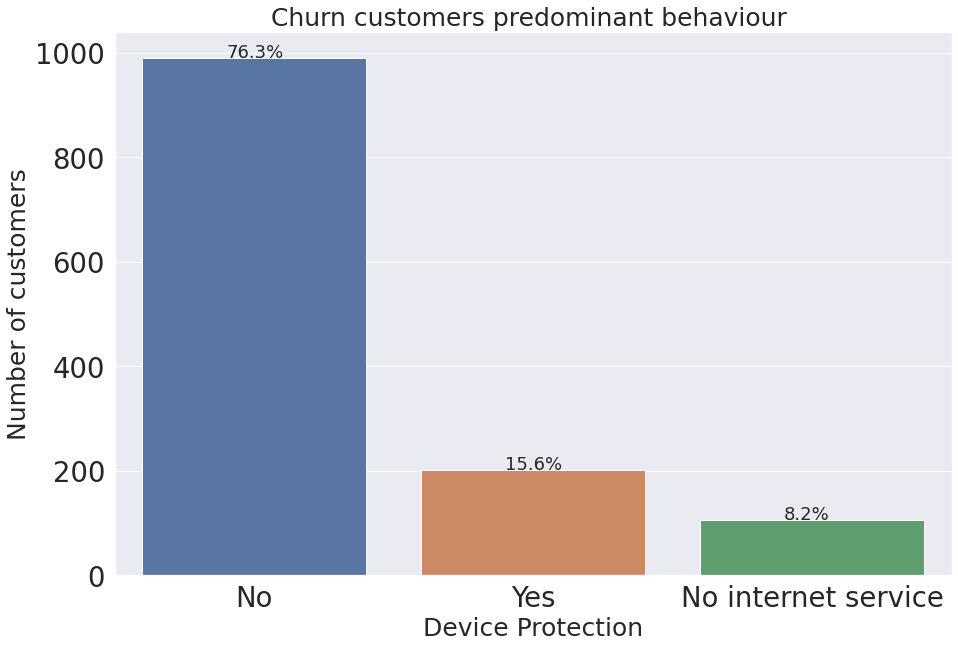

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='DeviceProtection', data=FirstSegment)
sns.set(font_scale=2.5)
ax.set_title('Churn customers predominant behaviour ' , fontsize = 25)
plt.xlabel('Device Protection', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(FirstSegment))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

In [ ]:
#Segmentation for non-churn customer
#Churn data

dataKeep

In [ ]:
no_churn = df[df["Churn"]=="No"]
no_churn.shape

(5174, 21)

In [ ]:
NochurnDf.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
3  No phone service             DSL            Yes  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
3         Yes          No              No        One year               No   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
3  Bank transfer (automatic)          42.30       1840.75     No  
6    Credit card (automatic)          89.10       1949.40     No  
7               Mailed check          29.75        301.90     No  

[5 rows x 21 columns]

In [ ]:
no_churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
dropDF = no_churn
dropDF.shape

(5163, 21)

In [ ]:
dropDF.dropna(axis=0, inplace=True)


<ipython-input-123-8dca1ff64b7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropDF.dropna(axis=0, inplace=True)


In [ ]:
no_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
no_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
3  No phone service             DSL            Yes  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
3         Yes          No              No        One year               No   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
3  Bank transfer (automatic)          42.30       1840.75     No  
6    Credit card (automatic)          89.10       1949.40     No  
7               Mailed check          29.75        301.90     No  

[5 rows x 21 columns]

In [ ]:

Keep_no_churn = no_churn

In [ ]:
#df.drop(['A', 'B'], axis=1, inplace=True)

In [ ]:
Keep_no_churn.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
3    Male              0      No         No      45           No   
6    Male              0      No        Yes      22          Yes   
7  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
3  No phone service             DSL            Yes           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
3              Yes         Yes          No              No        One year   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes           Electronic check           29.85         29.85  
1               No               Mailed check           56.95       1889.50  
3               No  Bank transfer (automatic)           42.30       1840.75  
6              Yes    Credit card (automatic)           89.10       1949.40  
7               No               Mailed check           29.75        301.90

In [ ]:
Keep_no_churn.shape

(5163, 19)

In [ ]:
#Encoding
# encode categorical variables
le = LabelEncoder()

In [ ]:
# loop through each column in the dataframe
for column in Keep_no_churn.columns:
    # check if the column has object datatype (i.e. categorical)
    if Keep_no_churn[column].dtype == 'object':
        # use LabelEncoder to encode the categorical values
        Keep_no_churn[column] = le.fit_transform(Keep_no_churn[column])

<ipython-input-132-7e9bbad642e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Keep_no_churn[column] = le.fit_transform(Keep_no_churn[column])
<ipython-input-132-7e9bbad642e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Keep_no_churn[column] = le.fit_transform(Keep_no_churn[column])
<ipython-input-132-7e9bbad642e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
Keep_no_churn.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
3       1              0        0           0      45             0   
6       1              0        0           1      22             1   
7       0              0        0           0      10             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
3              1                0               2             0   
6              2                1               0             2   
7              1                0               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
3                 2            2            0                0         1   
6                 0            0            2                0         0   
7                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  
1                 0              3           56.95       1889.50  
3                 0              0           42.30       1840.75  
6                 1              1           89.10       1949.40  
7                 0              3           29.75        301.90

In [ ]:
X = Keep_no_churn.values

In [ ]:
standardizer = StandardScaler()
X= standardizer.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

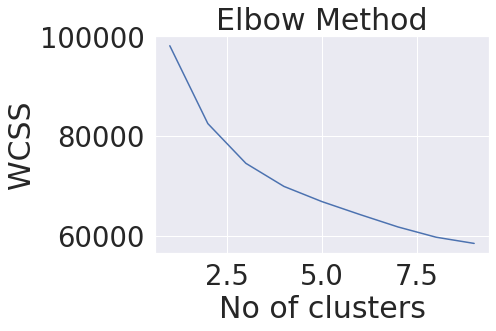

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#From the elbow method above, the optimal number of clusters to be used is 2
kmeans = KMeans(n_clusters= 2, init='k-means++', random_state = 35)
y_means= kmeans.fit_predict (X)

y_means



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA
pca = decomposition.PCA()
X_decomp = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.22248186, 0.11218536, 0.07821713, 0.06556404, 0.05696952,
       0.0526986 , 0.05092526, 0.0461607 , 0.04405573, 0.04200296,
       0.03875627, 0.03854388, 0.03685199, 0.03065698, 0.02972419,
       0.02441702, 0.01704661, 0.0101681 , 0.0025738 ])

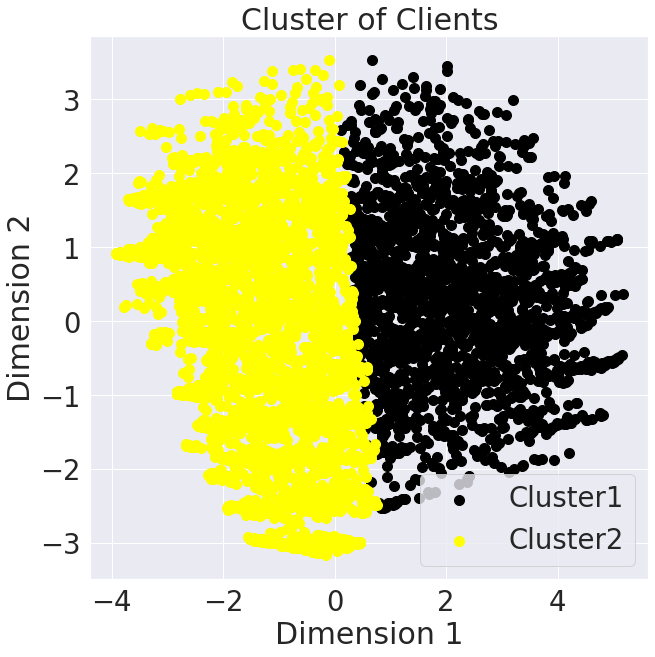

In [ ]:
#Visualize the cluster
color_list = ['black','yellow']
plt.figure(figsize=(10,10))
for i in range(2):
    plt.scatter(X_decomp[y_means== i, 0], X_decomp[y_means== i, 1], s=100, c = color_list[i], label ='Cluster'+ str(i+1))
plt.title('Cluster of Clients')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [ ]:
# Convert y_means to dataframe

In [ ]:
NotChurnSegments=pd.DataFrame(y_means,columns=['Clusters'] )

In [ ]:
NotChurnSegments.head()

Clusters
0         1
1         1
2         1
3         1
4         1

In [ ]:
NotChurnSegments["Clusters"].value_counts(normalize=True)

1    0.616502
0    0.383498
Name: Clusters, dtype: float64

In [ ]:
# Get the nor churn data to use

In [ ]:
NotChurnSegments.shape

(5163, 1)

In [ ]:
df.shape

(7043, 21)

In [ ]:
unChurned = df[df["Churn"]=="No"]

In [ ]:
unChurned

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
3     7795-CFOCW    Male              0      No         No      45   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
...          ...     ...            ...     ...        ...     ...   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0              No  No phone service             DSL                   No  ...   
1             Yes                No             DSL                  Yes  ...   
3              No  No phone service             DSL                  Yes  ...   
6             Yes               Yes     Fiber optic                   No  ...   
7              No  No phone service             DSL                  Yes  ...   
...           ...               ...             ...                  ...  ...   
7037          Yes                No              No  No internet service  ...   
7038          Yes               Yes             DSL                  Yes  ...   
7039          Yes               Yes     Fiber optic                   No  ...   
7040           No  No phone service             DSL                  Yes  ...   
7042          Yes                No     Fiber optic                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
0                      No                   No                   No   
1                     Yes                   No                   No   
3                     Yes                  Yes                   No   
6                      No                   No                  Yes   
7                      No                   No                   No   
...                   ...                  ...                  ...   
7037  No internet service  No internet service  No internet service   
7038                  Yes                  Yes                  Yes   
7039                  Yes                   No                  Yes   
7040                   No                   No                   No   
7042                  Yes                  Yes                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
0                      No  Month-to-month              Yes   
1                      No        One year               No   
3                      No        One year               No   
6                      No  Month-to-month              Yes   
7                      No  Month-to-month               No   
...                   ...             ...              ...   
7037  No internet service        Two year              Yes   
7038                  Yes        One year              Yes   
7039                  Yes        One year              Yes   
7040                   No  Month-to-month              Yes   
7042                  Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
0              Electronic check          29.85         29.85     No  
1                  Mailed check          56.95       1889.50     No  
3     Bank transfer (automatic)          42.30       1840.75     No  
6       Credit card (automatic)          89.10       1949.40     No  
7                  Mailed check          29.75        301.90     No  
...                         ...            ...           ...    ...  
7037  Bank transfer (automatic)          21.15       1419.40     No  
7038               Mailed check   

In [ ]:
# Removinf missing values

In [ ]:
unChurned2 = unChurned

In [ ]:
unChurned2.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
unChurned2 = unChurned2.dropna()

In [ ]:
unChurned2.shape

(5163, 21)

In [ ]:
# To add both dataframes
import pandas as pd

# use reset_index() to align the indices of df1 and df2
unChurned2 = unChurned2.reset_index(drop=True)
NotChurnSegments = NotChurnSegments.reset_index(drop=True)

# concatenate df2 to df1 using concat()
NotChurnSegmentsDF = pd.concat([unChurned2, NotChurnSegments], axis=1)



In [ ]:
NotChurnSegmentsDF.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  7795-CFOCW    Male              0      No         No      45           No   
3  1452-KIOVK    Male              0      No        Yes      22          Yes   
4  6713-OKOMC  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2  No phone service             DSL            Yes  ...         Yes   
3               Yes     Fiber optic             No  ...          No   
4  No phone service             DSL            Yes  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No        One year               No   
3         Yes              No  Month-to-month              Yes   
4          No              No  Month-to-month               No   

               PaymentMethod MonthlyCharges TotalCharges  Churn  Clusters  
0           Electronic check          29.85        29.85     No         1  
1               Mailed check          56.95      1889.50     No         1  
2  Bank transfer (automatic)          42.30      1840.75     No         1  
3    Credit card (automatic)          89.10      1949.40     No         1  
4               Mailed check          29.75       301.90     No         1  

[5 rows x 22 columns]

In [ ]:
NotChurnSegmentsDF.shape

(5163, 22)

In [ ]:
NotChurnSegmentsDF["Clusters"].value_counts(normalize=True)

1    0.616502
0    0.383498
Name: Clusters, dtype: float64

In [ ]:
NotChurnSegmentsDF["Clusters"].value_counts()

1    3183
0    1980
Name: Clusters, dtype: int64

In [ ]:
# Cluster 1 is more important

NotChurnFirstSeg = NotChurnSegmentsDF[NotChurnSegmentsDF["Clusters"]==1]
NotChurnFirstSeg.head()
NotChurnFirstSeg.shape

(3183, 22)

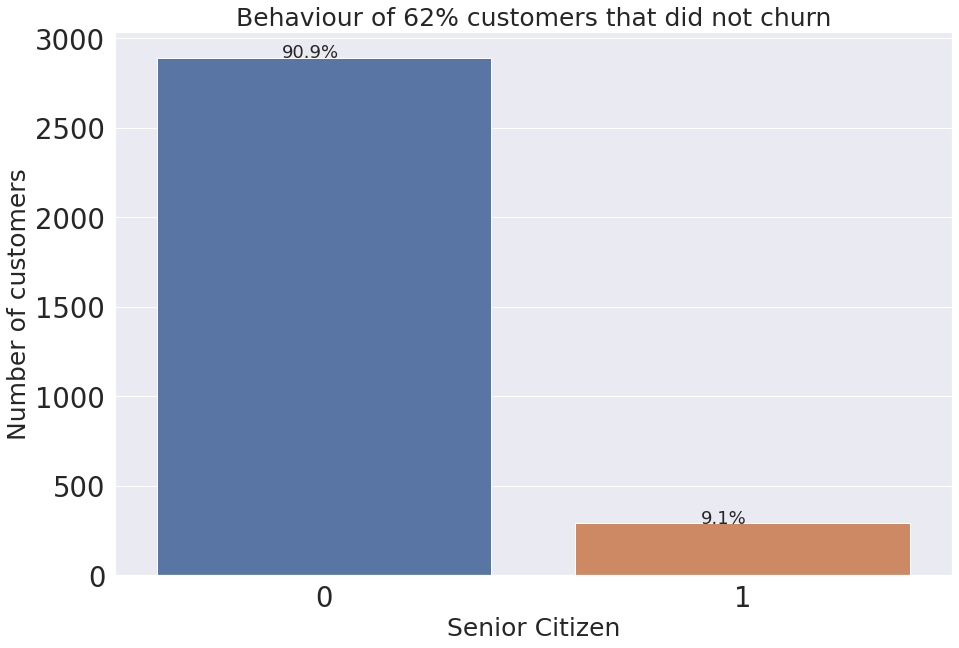

In [ ]:
# Show behaviour of 62% customers that did not churn
plt.figure(figsize=(15,10))
ax=sns.countplot(x='SeniorCitizen', data=NotChurnFirstSeg)
sns.set(font_scale=2.5)
ax.set_title('Behaviour of 62% customers that did not churn' , fontsize = 25)
plt.xlabel('Senior Citizen', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(NotChurnFirstSeg))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

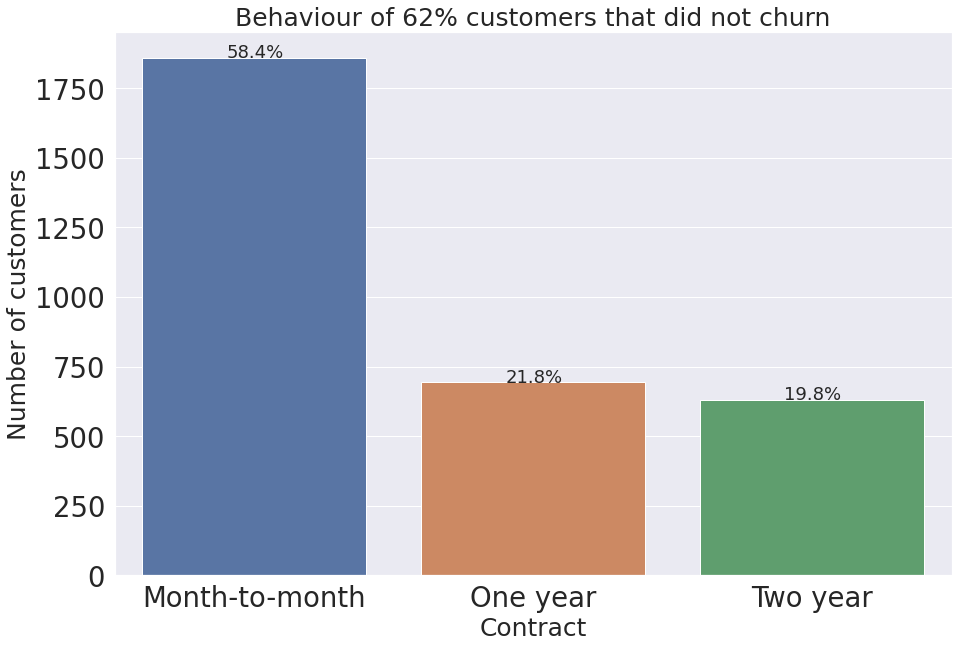

In [ ]:
# Show behaviour of 62% customers that did not churn
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Contract', data=NotChurnFirstSeg)
sns.set(font_scale=2.5)
ax.set_title('Behaviour of 62% customers that did not churn' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(NotChurnFirstSeg))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

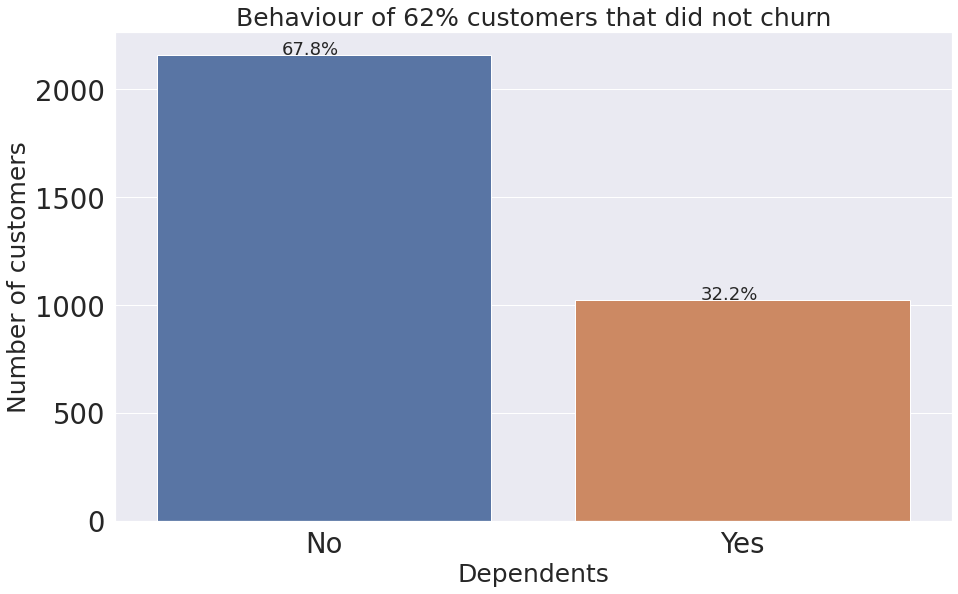

In [ ]:
# Show behaviour of 62% customers that did not churn
plt.figure(figsize=(15,9))
ax=sns.countplot(x='Dependents', data=NotChurnFirstSeg)
sns.set(font_scale=2.5)
ax.set_title('Behaviour of 62% customers that did not churn' , fontsize = 25)
plt.xlabel('Dependents', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(NotChurnFirstSeg))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

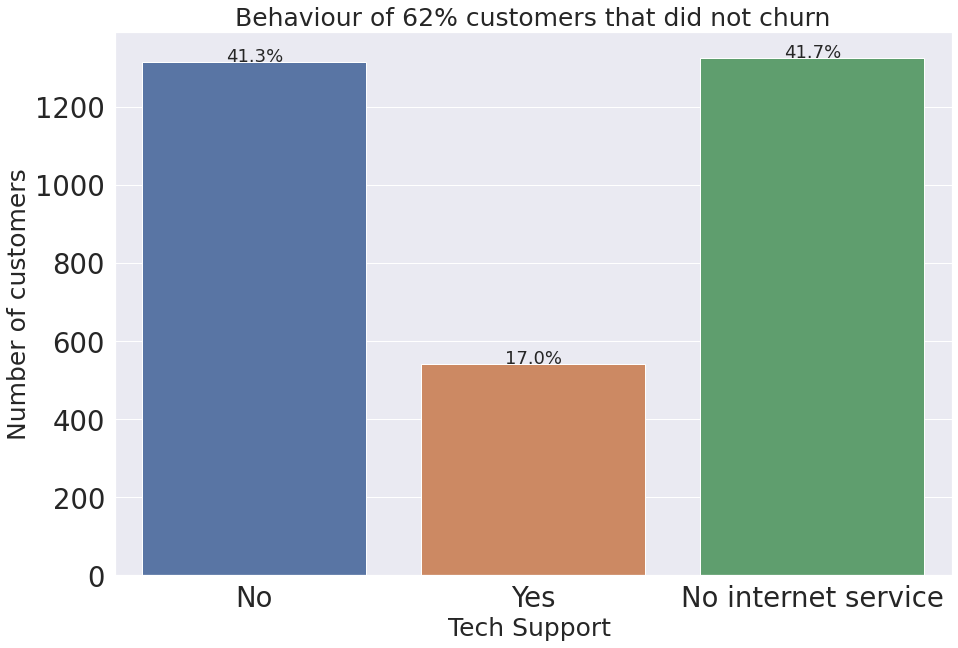

In [ ]:
# Show behaviour of 62% customers that did not churn
plt.figure(figsize=(15,10))
ax=sns.countplot(x='TechSupport', data=NotChurnFirstSeg)
sns.set(font_scale=2.5)
ax.set_title('Behaviour of 62% customers that did not churn' , fontsize = 25)
plt.xlabel('Tech Support ', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(NotChurnFirstSeg))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

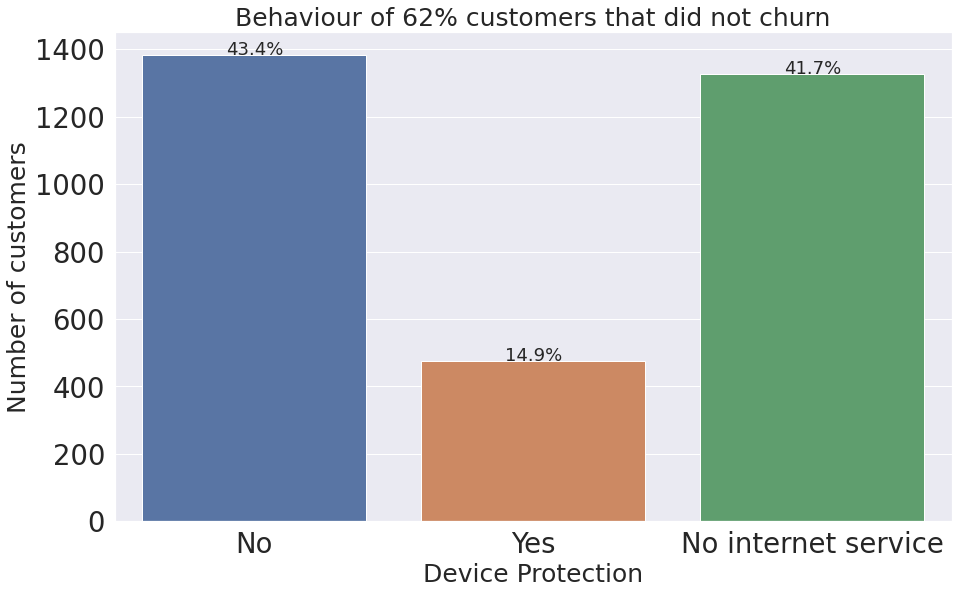

In [ ]:
# Show behaviour of 62% customers that did not churn
plt.figure(figsize=(15,9))
ax=sns.countplot(x='DeviceProtection', data=NotChurnFirstSeg)
sns.set(font_scale=2.5)
ax.set_title('Behaviour of 62% customers that did not churn' , fontsize = 25)
plt.xlabel('Device Protection', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(NotChurnFirstSeg))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

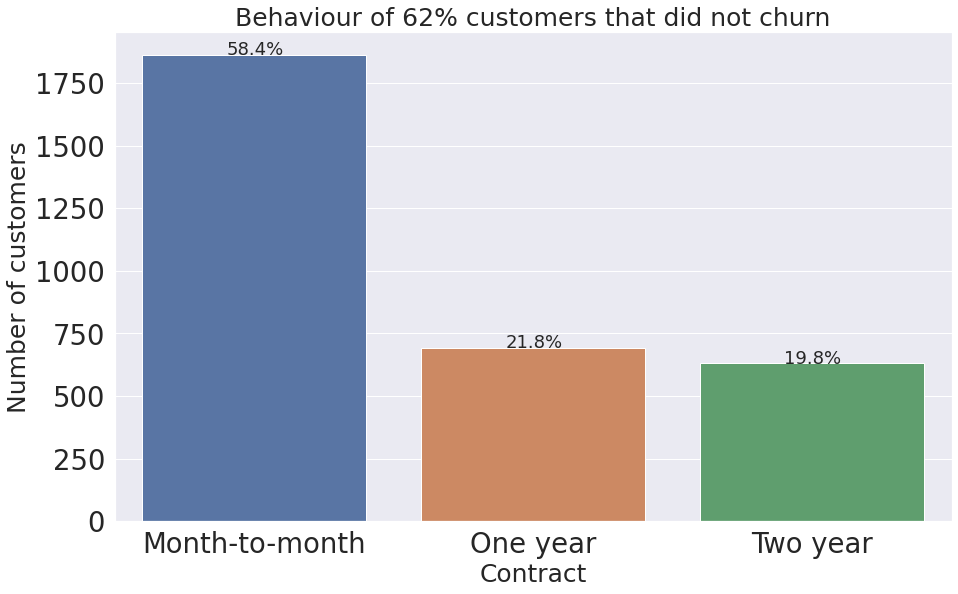

In [ ]:
# Show behaviour of 62% customers that did not churn
plt.figure(figsize=(15,9))
ax=sns.countplot(x='Contract', data=NotChurnFirstSeg)
sns.set(font_scale=2.5)
ax.set_title('Behaviour of 62% customers that did not churn' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(NotChurnFirstSeg))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

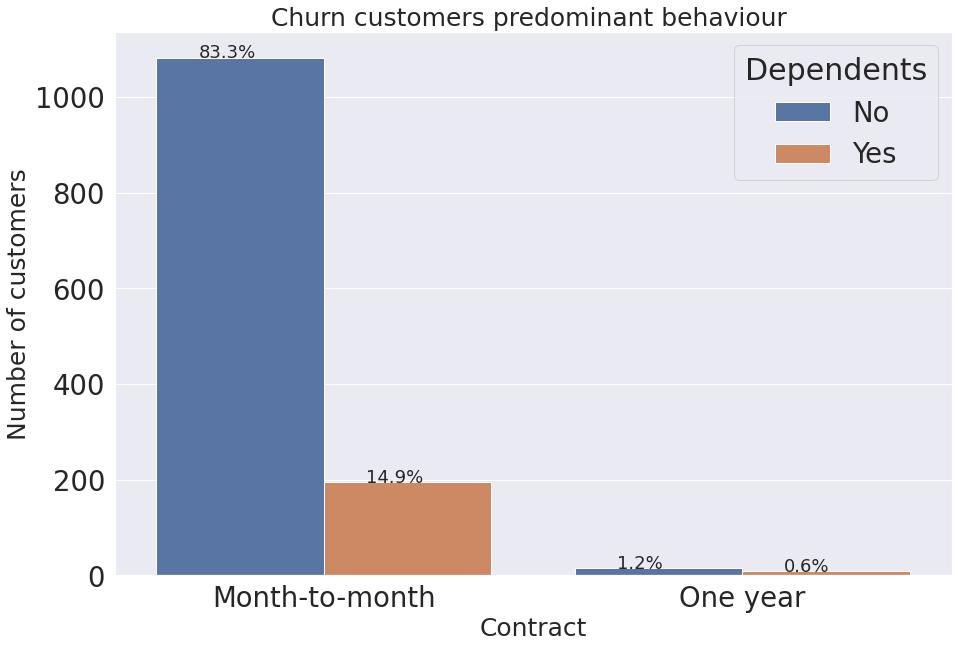

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Contract', hue="Dependents", data=FirstSegment)
sns.set(font_scale=2.5)
ax.set_title('Churn customers predominant behaviour ' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(FirstSegment))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

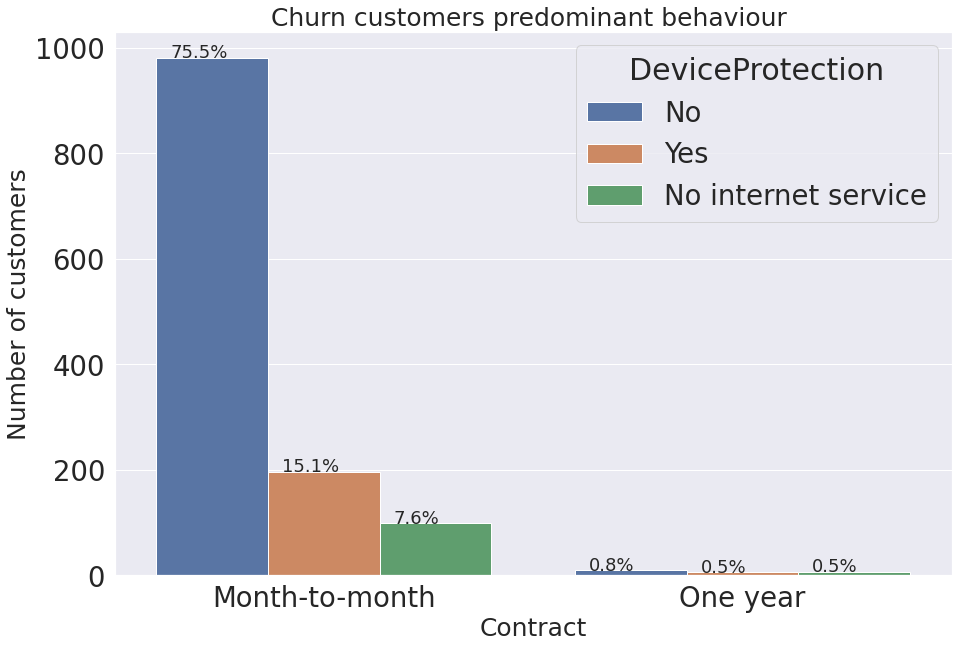

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Contract', hue="DeviceProtection", data=FirstSegment)
sns.set(font_scale=2.5)
ax.set_title('Churn customers predominant behaviour ' , fontsize = 25)
plt.xlabel('Contract', fontsize=25)
plt.ylabel('Number of customers', fontsize=25)
plt.xticks(rotation='horizontal')

total = float(len(FirstSegment))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)